# INFO-F-422 -  Statistical Foundations of Machine Learning 

### MATAGNE Miro-Manuel - __[Miro-Manuel.Matagne@ulb.be](mailto:Miro-Manuel.Matagne@ulb.be) - Student ID 459668__
### Student 2 - __[student2@vub.ac.be](mailto:student2@ulb.ac.be) - Student ID 789012__
### Student 3 - __[student3@ulb.ac.be](mailto:student3@ulb.ac.be) - Student ID 345678__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


## Read the datasets

The training datasets are imported (*training* here means that this data will not be used for the final assessment of the solution quality by DrivenData).

Notice that the characters are read as factors in order to be able to study the categorical variables later on.

In [1]:
X <- read.csv("training_set_values.csv",stringsAsFactors = T)
Y <- read.csv("training_set_labels.csv",stringsAsFactors = T)

The dataset on which we will have to establush predictions for the DrivenData is also loaded.

In [2]:
eval_data <- read.csv("test_set_values.csv",stringsAsFactors = T)

## Data exploration

For both these datasets, the dimensions, the head and the summary are displayed in order to get a first feel of the data.

The X dataset contains 59400 samples with 40 different features, of which 30 are categorical and 10 are numerical.

In [3]:
options(repr.matrix.max.cols=50)
dim(X)
head(X)
summary(X)

[1] 59400    40

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,GeoData Consultants Ltd,Other,,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,,,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


       id          amount_tsh          date_recorded  
 Min.   :    0   Min.   :     0.0   2011-03-15:  572  
 1st Qu.:18520   1st Qu.:     0.0   2011-03-17:  558  
 Median :37062   Median :     0.0   2013-02-03:  546  
 Mean   :37115   Mean   :   317.7   2011-03-14:  520  
 3rd Qu.:55656   3rd Qu.:    20.0   2011-03-16:  513  
 Max.   :74247   Max.   :350000.0   2011-03-18:  497  
                                    (Other)   :56194  
                    funder        gps_height          installer    
 Government Of Tanzania: 9084   Min.   : -90.0   DWE       :17402  
                       : 3635   1st Qu.:   0.0             : 3655  
 Danida                : 3114   Median : 369.0   Government: 1825  
 Hesawa                : 2202   Mean   : 668.3   RWE       : 1206  
 Rwssp                 : 1374   3rd Qu.:1319.2   Commu     : 1060  
 World Bank            : 1349   Max.   :2770.0   DANIDA    : 1050  
 (Other)               :38642                    (Other)   :33202  
   longitude    

In [4]:
categorical_variables <- which(sapply(X[1,],class)=="factor")
length(categorical_variables)

[1] 30

The target variable is a categorical variable with 3 different levels, indicating if the water pump is functional, functional but needs repair or non functional.

In [5]:
dim(Y)
head(Y)
summary(Y)

[1] 59400     2

,id,status_group
,<int>,<fct>
1,69572,functional
2,8776,functional
3,34310,functional
4,67743,non functional
5,19728,functional
6,9944,functional


       id                         status_group  
 Min.   :    0   functional             :32259  
 1st Qu.:18520   functional needs repair: 4317  
 Median :37062   non functional         :22824  
 Mean   :37115                                  
 3rd Qu.:55656                                  
 Max.   :74247                                  

This histogram shows the number of samples corresponding to each class of the target variable. Notice that there are large differences in terms of numbers of samples corresponding to each class. In particular, we see that there are very few samples falling in the category $functional\ needs\ repair$, which might be a problem because a model will have a lot of trouble predicting this class since the number of corresponding training samples is very low.

[1] Functional : 32259

[1] Functional needs repair : 4317

[1] Non functional : 22824

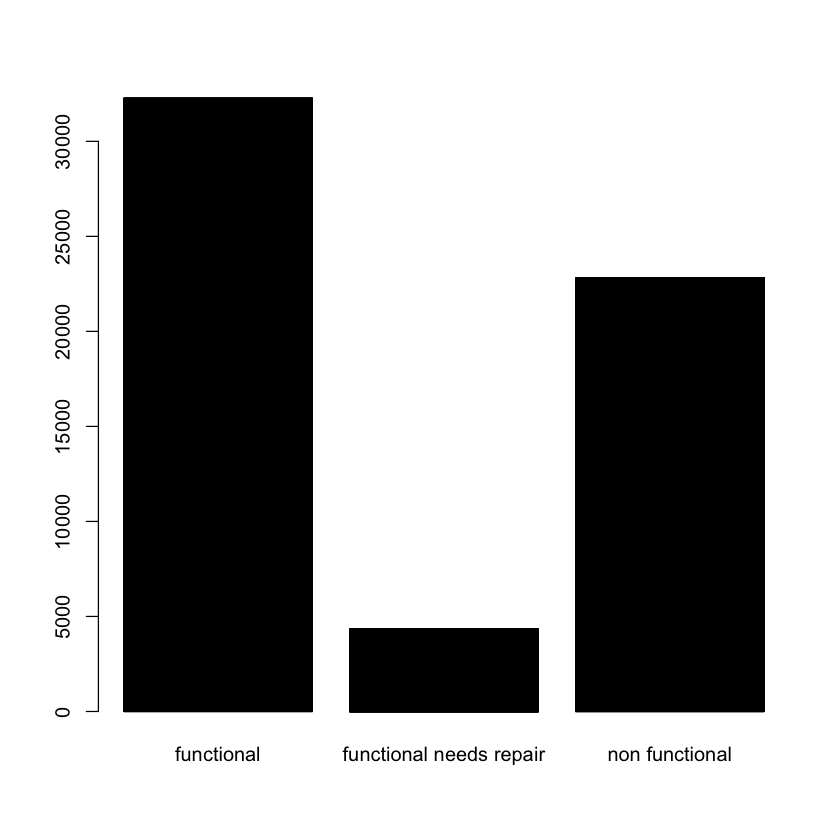

In [6]:
noquote(paste("Functional :",sum(Y$status_group=="functional")))
noquote(paste("Functional needs repair :",sum(Y$status_group=="functional needs repair")))
noquote(paste("Non functional :",sum(Y$status_group=="non functional")))

barplot(table(Y))

# Data preprocessing

## Missing value imputation


We check if there are any NA values in the dataset. The results show that no empty values are present in either dataset.

In [7]:
sum(is.na(X))
sum(is.na(Y))

[1] 0

[1] 0

It is however important to note that this result does not look for empty strings or $none$ strings in the categorical variables. Indeed, we saw previously in the summaries of the datasets that there were wome empty strings, for example for features $funder$, $installer$, $subvillage$, $scheme\_management$,...

It is also important to check that all entries in X have a corresponding entry in Y. To do so, we merge the 2 datasets X and Y based on their common feature $id$ and check the dimension of the resulting dataset. As expected, the merged dataset has 59400 entries and 41 features, which means that for all samples in X there exists a corresponding sample in Y.

In [5]:
data <- merge(X,Y)
dim(data)
head(data)
demo_data <- data

[1] 59400    41

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


By representing the number of missing values for each categorical variable, it stands out that the feature $scheme\_name$ has nearly 50% of missing values. The missing values will be treated in several different ways :
- removing the samples with the missing values
- considering the missing values as a category on their own
- keeping only the relevant classes of the problematic features through one hot encoding (for example discard the column resulting from the none class in the one hot encoding but keeping the rest)

In [6]:
empty_count <- c()
for (c in colnames(data[,categorical_variables])) { 
    a <- dim(data[data[,c] == "none" | data[,c] == "",])[1]
    empty_count <- c(empty_count,a)
}

df <- data.frame(variable=colnames(data[,categorical_variables]),empty_count=empty_count,percentage=empty_count/nrow(data))
df[df$empty_count != 0,]

,variable,empty_count,percentage
,<chr>,<int>,<dbl>
2,funder,3635,0.061195286
3,installer,3655,0.061531987
4,wpt_name,3563,0.059983165
6,subvillage,371,0.006245791
10,public_meeting,3334,0.056127946
12,scheme_management,3877,0.065269360
13,scheme_name,28191,0.474595960
14,permit,3056,0.051447811


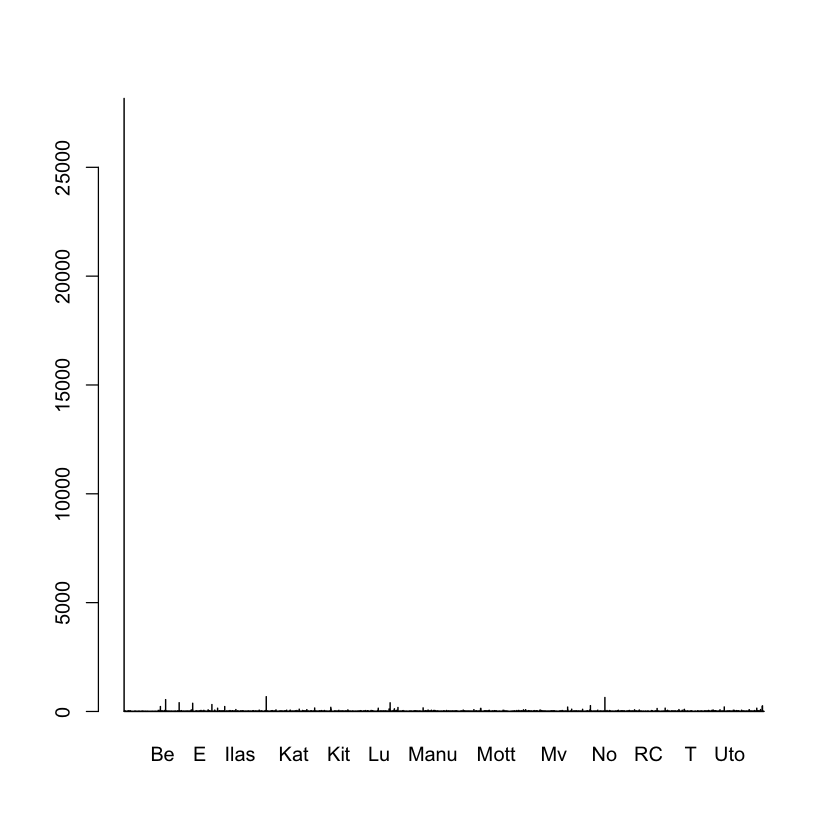

In [7]:
barplot(table(data$scheme_name))

In [8]:
remove_scheme_name <- function(df) {
    return(subset(df,select=-c(scheme_name)))
}

## Dataset balancing

In order to avoid the previously described situation where the models will predict only the very frequent classes, some dataset balancing can be done. It is important to understand this does not necessarily yield better results, but it could, and this is why it was implemented. Indeed, sometimes the frequency of apparition of certain classes is actually very relevant, and moreover if the dataset is large enough the minority class might be representative enough in the sense that it contains all relevant information in its features to be classified.

The 2 dataset balancing techniques that were tested are SMOTE and oversampling.

### SMOTE

In [1]:
install.packages("performanceEstimation")


The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpNdLtCx/downloaded_packages


In [9]:
library(performanceEstimation)

In [10]:
create_smote_dataset <- function(df) {
    df <- smote(status_group ~ ., df, perc.over = 3,perc.under=3)
    return(df)
}

In [7]:
demo_data <- create_smote_dataset(demo_data)

In [ ]:
barplot(table(demo_data$status_group))

In [85]:
dim(demo_data)

[1] 56121    41

### Over sampling

In [12]:
create_over_sampling_dataset <- function(df) {
    to_dup <- df[data$status_group == "functional needs repair",]
    for(i in 1:4) {
        df <- rbind(df,to_dup)
    }
    to_remove <- which(data$status_group == "functional")[1:10000]
    #print(to_remove)
    return(df[-to_remove,])
}

In [24]:
demo_data <- data

In [25]:
dem <- create_over_sampling_dataset(demo_data)

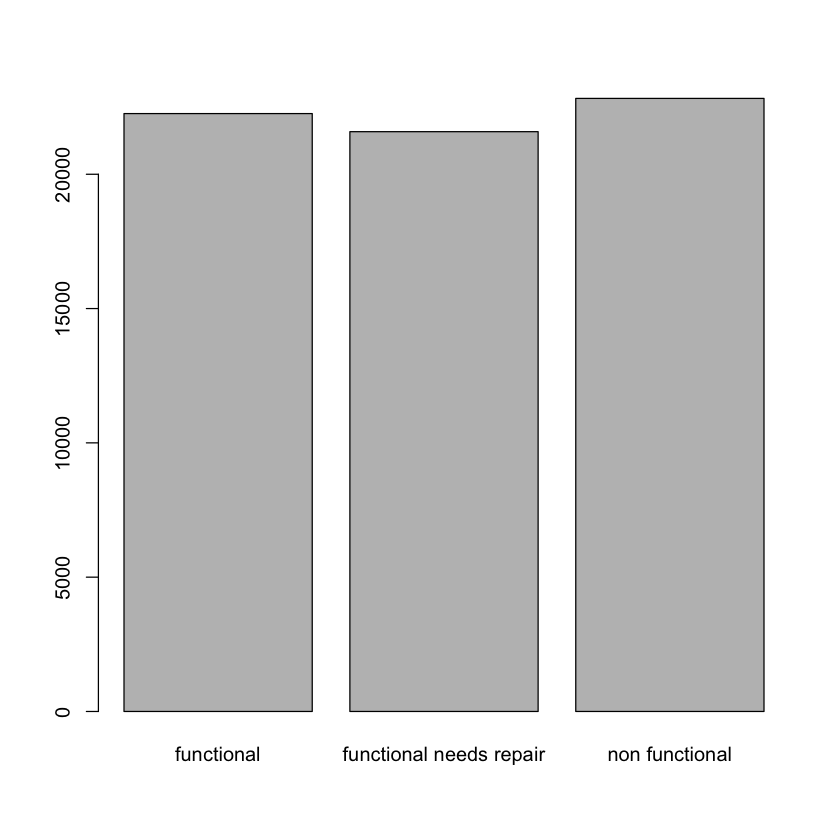

In [26]:
barplot(table(dem$status_group))

In [90]:
dim(demo_data)

[1] 76668    41

## Handle categorical variables

All the categorical variables present in the merged dataset are presented below.

In [16]:
categorical_variables <- which(sapply(data[1,],class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"
[31] "status_group"

### Useless features

A check is made to ensure all categorical variables take more than 1 possible value, otherwise they are not necessary since they do not bring any information. The following code shows that the feature $recorded\_by$ contains only 1 factor, which is $GeoData Consultants Ltd$.

In [13]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l < 2) {
        print(n)
        print(data[1,n])
    }
}

[1] "recorded_by"
[1] GeoData Consultants Ltd
Levels: GeoData Consultants Ltd


In [14]:
remove_useless_features <- function(df) {
    df <- subset(df,select=-c(recorded_by))
    return(df)
}

In [95]:
demo_data <- remove_useless_features(demo_data)

In [96]:
dim(demo_data)

[1] 76668    40

## Boolean features

By analyzing the features that contain 3 classes, we see that some of them are boolean features ($public\_meeting$ and $permit$), which take the values True, False or an empty string. There is also a feature $source_class$ that contains only 2 classes and an $unknown$ class. By analyzing the distribution of the different classes of these features, we can see that the missing values are always very minoritary, we could therefore remove the problematic samples and encode these features as boolean 0-1 features.

[1] "public_meeting"
[1] 
Levels:  False True
[1] "permit"
[1] True
Levels:  False True


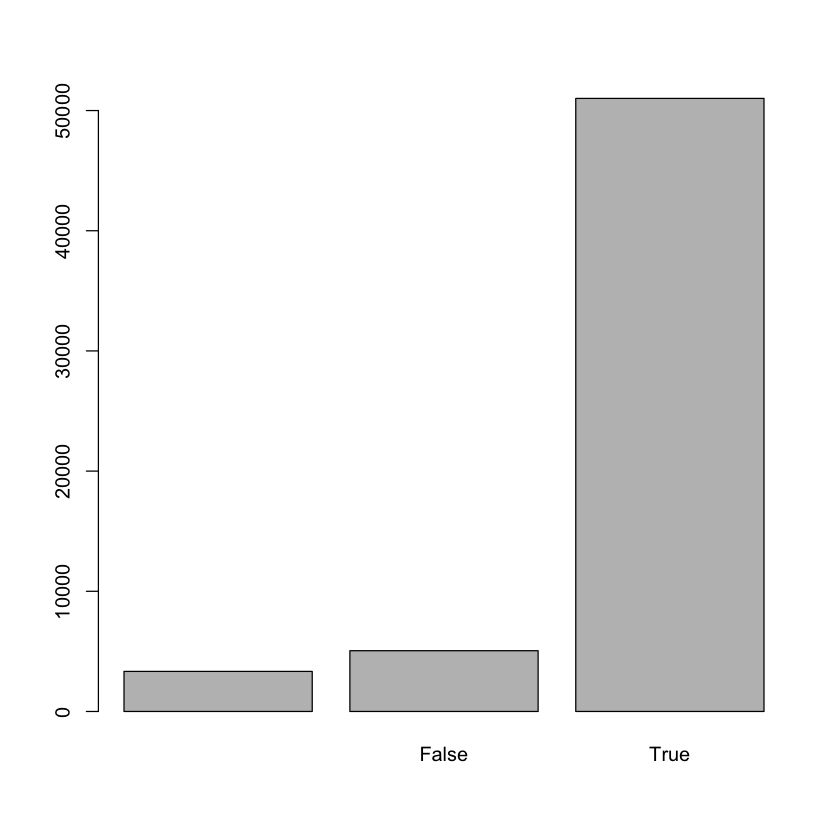

[1] "source_class"
[1] groundwater
Levels: groundwater surface unknown


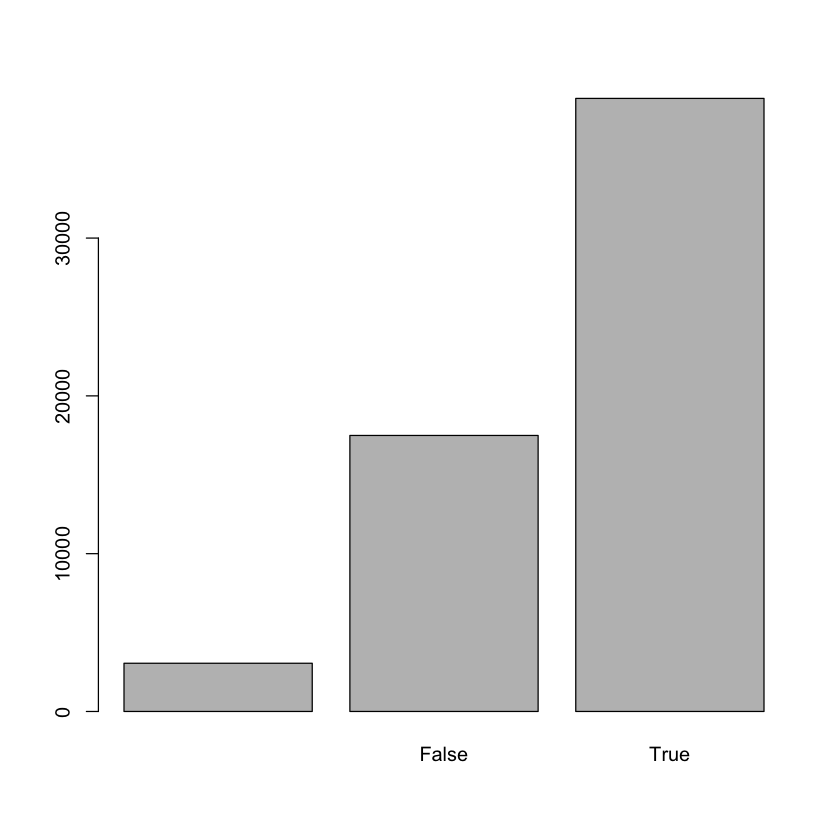

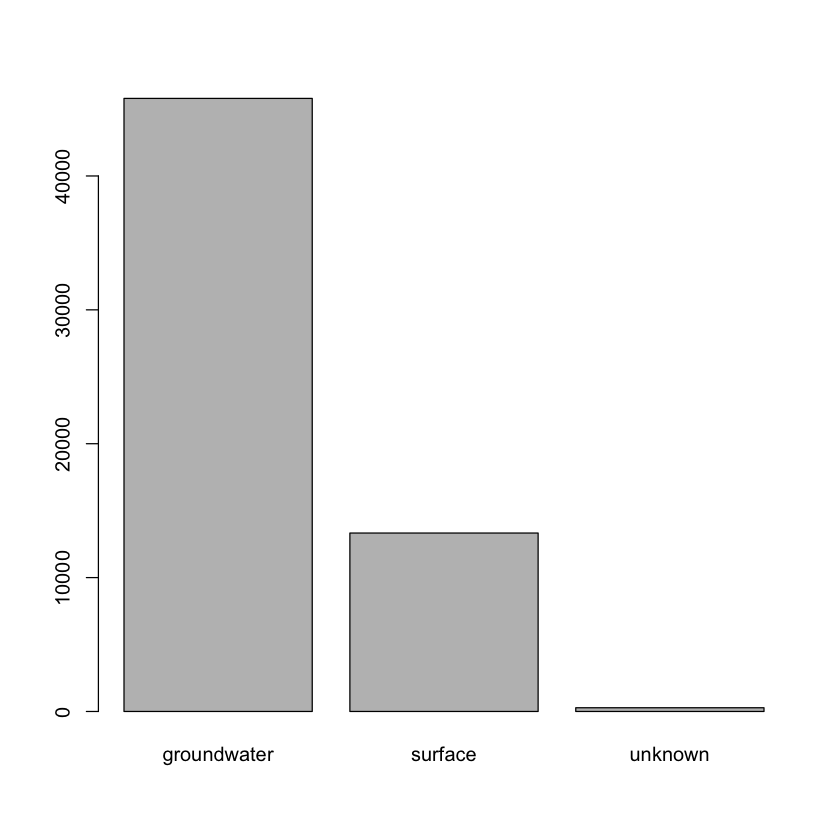

In [15]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l == 3) {
        print(n)
        print(data[1,n])
        barplot(table(data[,n]))
    }
}

In [16]:
create_binary_features <- function(df) {
    df <- df[df$public_meeting != "", ] 
    levels(df$public_meeting) <- c(levels(df$public_meeting), "1","0") 
    df$public_meeting[df$public_meeting == "True"] <- 1
    df$public_meeting[df$public_meeting != "1"] <- 0
    df <- transform(df, public_meeting = as.integer(as.character(public_meeting)))
    
    df <- df[df$permit != "", ] 
    levels(df$permit) <- c(levels(df$permit), "1","0") 
    df$permit[df$permit == "True"] <- 1
    df$permit[df$permit != "1"] <- 0
    df <- transform(df, permit = as.integer(as.character(permit)))
    
    df <- df[df$source_class != "unknown", ] 
    levels(df$source_class) <- c(levels(df$source_class), "1","0") 
    df$source_class[df$source_class == "groundwater"] <- 1
    df$source_class[df$source_class != "1"] <- 0
    df <- transform(df, source_class = as.integer(as.character(source_class)))
    return(df)
}

### Convert the dates

The feature $date\_recorded$ is a categorical variable but can easily be converted into a numerical one.

In [17]:
convert_date_to_numeric <- function(df) {
    df$date_recorded <- as.numeric(as.Date(df$date_recorded))
    return(df)
}

In [98]:
demo_data <- convert_date_to_numeric(demo_data)

In [18]:
head(demo_data,20)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,15657,Tasaf,0,TASAF,33.12583,-5.11815407,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,15038,Shipo,1978,SHIPO,34.77072,-9.39564152,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,15060,Lvia,0,LVIA,36.11506,-6.27926803,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,15859,Germany Republi,1639,CES,37.14743,-3.18755455,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,15055,Cmsr,0,CMSR,36.16489,-6.09928949,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,15031,Private,28,Private,39.28612,-6.97240273,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
7,6,0,15633,Government Of Tanzania,0,Government,33.22988,-3.85298271,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,True,GeoData Consultants Ltd,VWC,,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,non functional
8,7,0,15056,Water,0,Gover,36.31362,-6.71925716,Itawi,0,Rufiji,Mwangaza,Dodoma,1,1,Mpwapwa,Wotta,0,True,GeoData Consultants Ltd,VWC,Lwih,True,0,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,functional
9,8,0,15071,Water,0,Commu,35.93944,-6.01435820,Kwa Chiswagala,0,Wami / Ruvu,Mazengo,Dodoma,1,5,Dodoma Urban,Ipala,0,True,GeoData Consultants Ltd,VWC,Ipal,False,0,mono,mono,motorpump,private operator,commercial,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


### Handpicking redundant features

Some features are noticeably redudant at first sight, and we can therefore reduce the number of features.

In [20]:
table(data$extraction_type)
table(data$extraction_type_group)
table(data$extraction_type_class)


                  afridev                      cemo                    climax 
                     1770                        90                        32 
                  gravity             india mark ii            india mark iii 
                    26780                      2400                        98 
                      ksb                      mono               nira/tanira 
                     1415                      2865                      8154 
                    other other - mkulima/shinyanga         other - play pump 
                     6430                         2                        85 
        other - rope pump            other - swn 81               submersible 
                      451                       229                      4764 
                   swn 80                    walimi                  windmill 
                     3670                        48                       117 


        afridev         gravity   india mark ii  india mark iii            mono 
           1770           26780            2400              98            2865 
    nira/tanira           other  other handpump other motorpump       rope pump 
           8154            6430             364             122             451 
    submersible          swn 80    wind-powered 
           6179            3670             117 


     gravity     handpump    motorpump        other    rope pump  submersible 
       26780        16456         2987         6430          451         6179 
wind-powered 
         117 

In [11]:
table(data$management)
table(data$scheme_management)


         company            other   other - school       parastatal 
             685              844               99             1768 
private operator            trust          unknown              vwc 
            1971               78              561            40507 
 water authority      water board              wua              wug 
             904             2933             2535             6515 


                          Company             None            Other 
            3877             1061                1              766 
      Parastatal Private operator              SWC            Trust 
            1680             1063               97               72 
             VWC              WUA              WUG      Water Board 
           36793             2883             5206             2748 
 Water authority 
            3153 

In [19]:
table(data$waterpoint_type)
table(data$waterpoint_type_group)


              cattle trough          communal standpipe 
                        116                       28522 
communal standpipe multiple                         dam 
                       6103                           7 
                  hand pump             improved spring 
                      17488                         784 
                      other 
                       6380 


     cattle trough communal standpipe                dam          hand pump 
               116              34625                  7              17488 
   improved spring              other 
               784               6380 

In [20]:
table(data$source)
table(data$source_type)


                 dam             hand dtw                 lake 
                 656                  874                  765 
         machine dbh                other rainwater harvesting 
               11075                  212                 2295 
               river         shallow well               spring 
                9612                16824                17021 
             unknown 
                  66 


            borehole                  dam                other 
               11949                  656                  278 
rainwater harvesting           river/lake         shallow well 
                2295                10377                16824 
              spring 
               17021 

In [21]:
table(data$quantity)
table(data$quantity_group)


         dry       enough insufficient     seasonal      unknown 
        6246        33186        15129         4050          789 


         dry       enough insufficient     seasonal      unknown 
        6246        33186        15129         4050          789 

In [22]:
table(data$water_quality)
table(data$quality_group)


          coloured           fluoride fluoride abandoned              milky 
               490                200                 17                804 
             salty    salty abandoned               soft            unknown 
              4856                339              50818               1876 


 colored fluoride     good    milky    salty  unknown 
     490      217    50818      804     5195     1876 

In [25]:
table(data$payment)
table(data$payment_type)


            never pay                 other          pay annually 
                25348                  1054                  3642 
          pay monthly        pay per bucket pay when scheme fails 
                 8300                  8985                  3914 
              unknown 
                 8157 


  annually    monthly  never pay on failure      other per bucket    unknown 
      3642       8300      25348       3914       1054       8985       8157 

In [18]:
remove_redundant_features <- function(df) {
    df <- subset(df,select=-c(extraction_type,scheme_management,waterpoint_type_group,source_type,quantity_group,quality_group,payment))
    return(df)
}

### Handle the coordinates

The dataset contains $longitude$ and $latitude$ features which can be useful in the sense that the outcome of the prediction might depend on if the water pumps are located in a similar region.

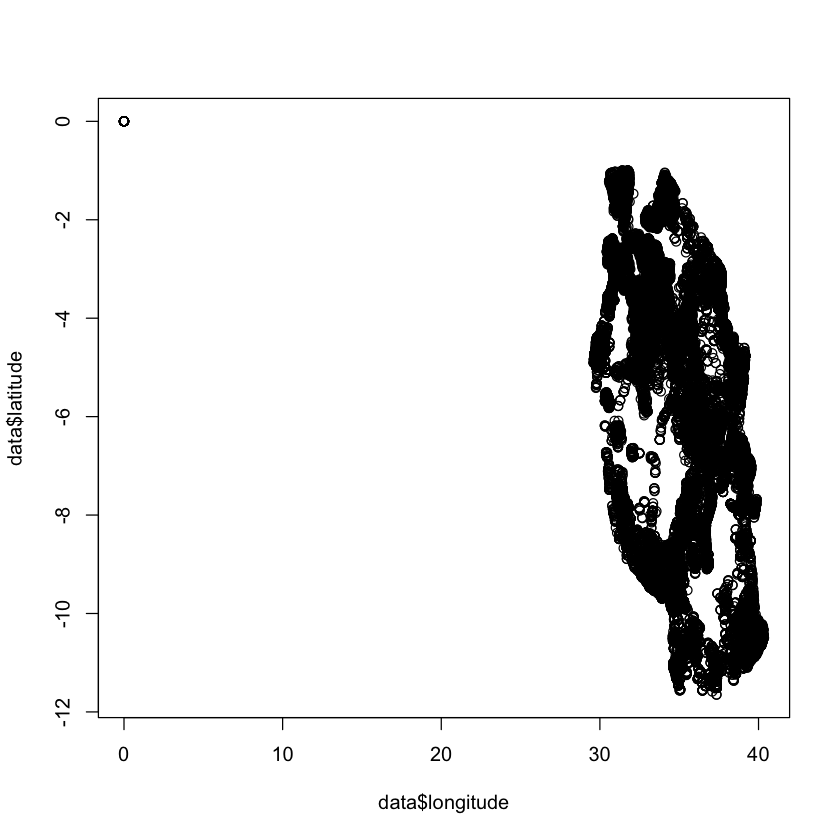

In [100]:
plot(data$longitude,data$latitude)

There seems to be some outliers having coordinates (0,0), which we will remove since they represent null values :

In [19]:
discard_unrealistic_coordinates <- function(df) {
    df <- df[df$longitude > 20 & df$latitude <0,]
    return(df)
}

In [121]:
demo_data <- discard_unrealistic_coordinates(demo_data)

In [103]:
dim(demo_data)

[1] 73312    40

The new longitudes and latitudes, after filtering, are represented below :

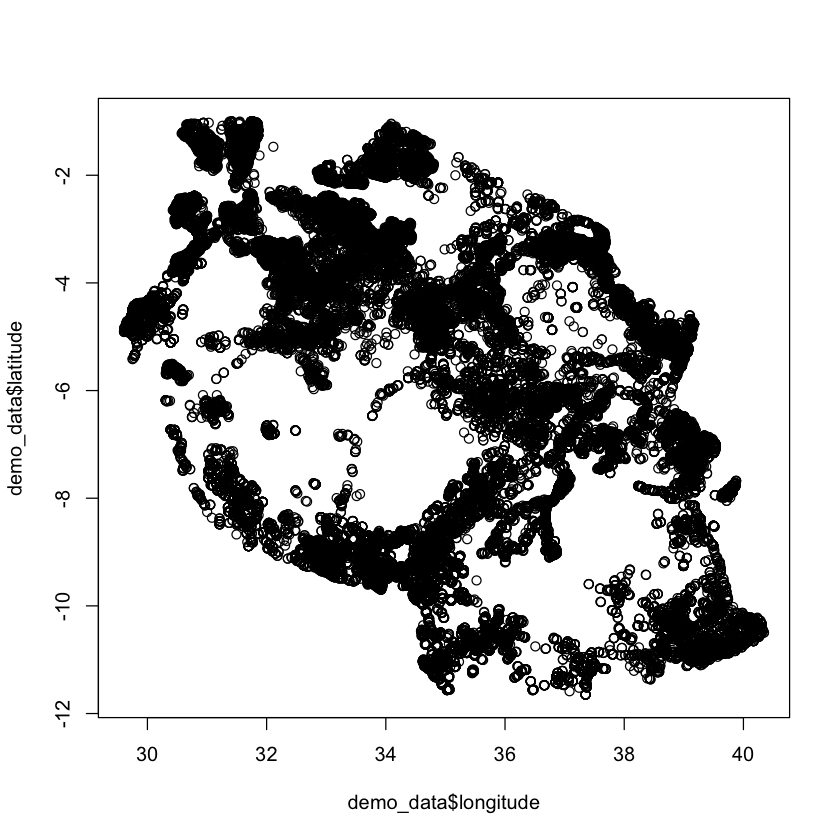

In [105]:
plot(demo_data$longitude,demo_data$latitude)

In [45]:
install.packages("factoextra")


also installing the dependencies ‘rematch’, ‘cellranger’, ‘readxl’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘carData’, ‘pbkrtest’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘flashClust’, ‘leaps’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’





The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpnmnZYn/downloaded_packages


In [20]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Although there is already an attribute $region\_code$ in the dataset, we might use these coordinates to our advantage by defining a custom notion of spaciality between the water pumps. Using k-means clustering, we can separate the pumps into k different geographical regions based on $longitude$ and $latitude$. The advangate of this method compared to the $region\_code$ feature is that we can choose how small or large the different regions are.

In [21]:
generate_regions <- function(df) {
    set.seed(19)
    coordinates <- as.data.frame(cbind(df$longitude,df$latitude))
    km_res <- kmeans(coordinates,8)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- km_res$cluster
    write.csv(km_res$centers,"cluster_centers.csv")
    return(df)
}
#head(km.res$cluster,20)

In [22]:
best_correlation <- 0
best_seed <- 1
correlations <- numeric(length(5:40))
dum <- dummy.data.frame(data[,ncol(data),drop=F],names=c("status_group"), sep="_")
coordinates <- as.data.frame(cbind(data$longitude,data$latitude))

for(k in 5:40) {
    for(s in 1:30) {
        set.seed(s)
        km_res <- kmeans(coordinates,k)
        region_kmeans <- km_res$cluster

        correlation <- 0
        for(i in 1:ncol(dum)) {
            correlation <- correlation + abs(cor(region_kmeans,dum[,i]))
        }
        correlations[k] <- correlations[k] + correlation
        if(correlation > best_correlation) {
            best_k <- k
            best_correlation <- correlation
            best_seed <- s
        }
    }
}


ERROR: Error in dummy.data.frame(data[, ncol(data), drop = F], names = c("status_group"), : could not find function "dummy.data.frame"


In [127]:
best_k
best_correlation
best_seed

[1] 8

[1] 0.3210632

[1] 19

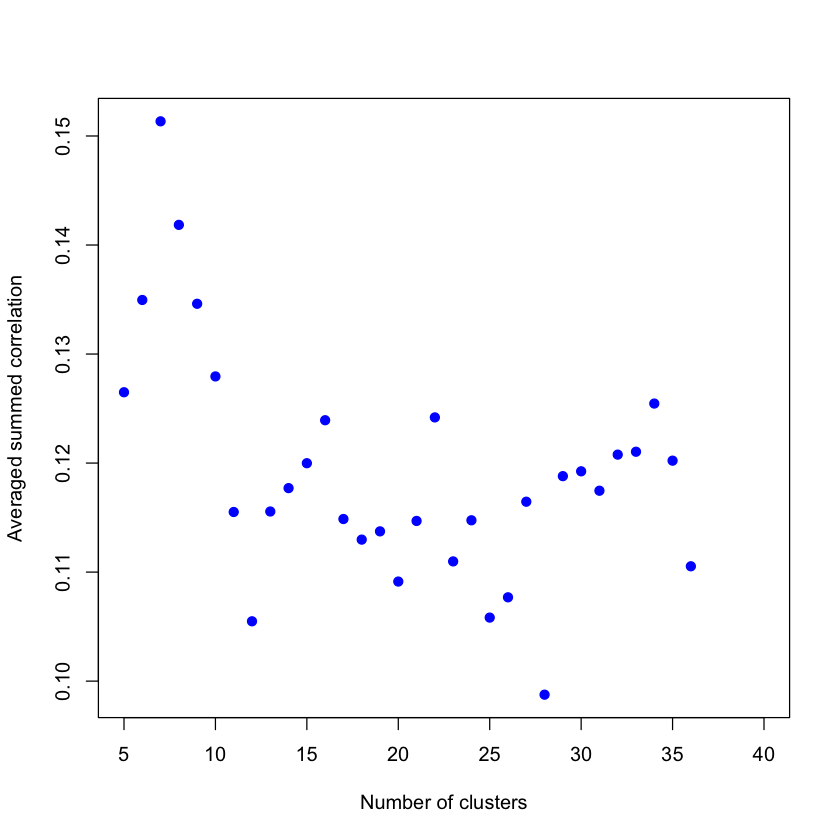

In [133]:
mean_cor <- correlations / 30
plot(5:40,mean_cor[5:40],xlab="Number of clusters",ylab="Averaged summed correlation",col = "blue",pch=19)

In [23]:
closest_cluster <- function(x) {
    centers <- read.csv("cluster_centers.csv")
    centers <- centers[,c("V1","V2")]
    #print(centers)
    #print(paste("x:",x))
    cluster_dist <- apply(centers, 1, function(y) sqrt(sum((x-y)^2)))
    return(which.min(cluster_dist)[1])
}

In [25]:
set_existing_regions <- function(df) {
    clusters2 <- apply(df[,c("longitude","latitude")], 1, closest_cluster)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- clusters2
    return(df)
}

In [75]:
options(repr.matrix.max.cols=50)
head(eval_data,20)
head(data,20)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,50785,0,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
2,51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
3,17168,0,2013-02-01,,1567,,34.76786,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
4,45559,0,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,,GeoData Consultants Ltd,VWC,,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
5,49871,500,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
6,52449,0,2013-03-04,Government Of Tanzania,1685,DWE,36.68528,-3.302420,Masaga,0,Pangani,Masaga,Arusha,2,2,Arusha Rural,Ilkiding'a,200,True,GeoData Consultants Ltd,VWC,Timbolo sambasha TPRI pipe line,True,1990,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
7,24806,0,2011-03-02,Government Of Tanzania,550,Gover,36.39804,-7.541382,none,0,Rufiji,Kichangani,Iringa,11,7,Kilolo,Mahenge,600,True,GeoData Consultants Ltd,VWC,,True,2007,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,28965,0,2013-01-25,Finw,234,FinW,39.60742,-10.893786,Kwa Mkwaa,0,Ruvuma / Southern Coast,Ilala,Mtwara,9,4,Tandahimba,Maundo,1,True,GeoData Consultants Ltd,Water Board,Borehole,True,1982,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
9,36301,30,2013-01-23,Unicef,584,LGA,39.26295,-10.823588,Kwa Mzee Mpini,0,Ruvuma / Southern Coast,Bondeni,Mtwara,90,33,Newala,Mnekachi,40,True,GeoData Consultants Ltd,VWC,MWS,False,1997,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.11815407,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.39564152,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.27926803,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.18755455,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.09928949,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.97240273,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
7,6,0,2012-10-20,Government Of Tanzania,0,Government,33.22988,-3.85298271,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,True,GeoData Consultants Ltd,VWC,,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,non functional
8,7,0,2011-03-23,Water,0,Gover,36.31362,-6.71925716,Itawi,0,Rufiji,Mwangaza,Dodoma,1,1,Mpwapwa,Wotta,0,True,GeoData Consultants Ltd,VWC,Lwih,True,0,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,functional
9,8,0,2011-04-07,Water,0,Commu,35.93944,-6.01435820,Kwa Chiswagala,0,Wami / Ruvu,Mazengo,Dodoma,1,5,Dodoma Urban,Ipala,0,True,GeoData Consultants Ltd,VWC,Ipal,False,0,mono,mono,motorpump,private operator,commercial,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


The graphical representation of the regions after the k-means clustering is shown below.

In [113]:
coordinates <- as.data.frame(cbind(demo_data$longitude,demo_data$latitude))
km_res <- kmeans(coordinates,20)
demo_data <- subset(demo_data,select=-c(longitude,latitude))
demo_data$region_kmeans <- km_res$cluster

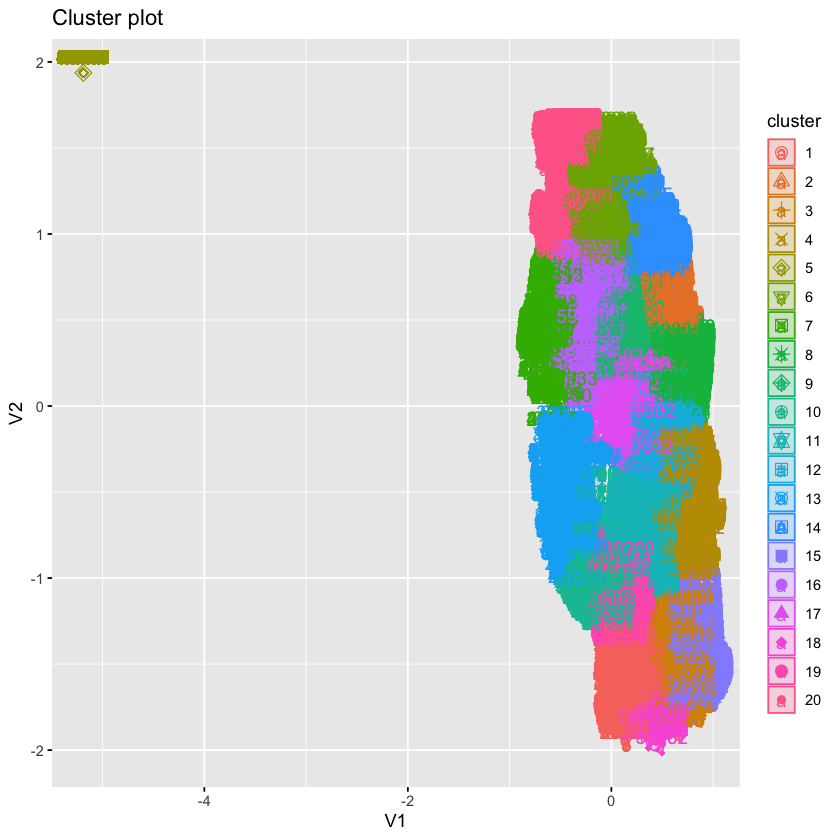

In [114]:
fviz_cluster(km_res,coordinates)

Therefore, we can now remove the longitude and latitude features from the dataset and replace them with a new feature called $region$, representing the cluster in which the pump is located.

In [76]:
options(repr.matrix.max.cols=50)
head(data)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


### Variables with too many levels

Some categorical variables that have too many levels could be useless for the problem. Indeed, let us imagine if each sample has a different factor for a given feature, this would not bring any additional information. This is why we check what features have a huge amount of features below :

In [26]:
categorical_variables <- which(sapply(data[1,],class)=="factor")

problematic_features <- c()

for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l > 1000 & n != "installer") {
        print(n)
        problematic_features <- c(problematic_features,n)
        print(data[1,n])
    }
}
problematic_features

[1] "funder"
[1] Tasaf
1898 Levels:  0 A/co Germany Aar Abas Ka Abasia ... Zingibali Secondary
[1] "wpt_name"
[1] Mratibu
37400 Levels: 24 A Kulwa A Saidi Abass Abbas Abdala Hamisi ... none
[1] "subvillage"
[1] Majengo
19288 Levels:  ## 'A' Kati 1 14Kambalage 18 19 20 22B 23B 24 24B 30 42 43 ... Zuri
[1] "ward"
[1] Igalula
2092 Levels: Aghondi Akheri Arash Arri Arusha Chini Babayu Badi Badugu ... Zuzu
[1] "scheme_name"
[1] 
2697 Levels:  14 Kambarage A ADP ADP Simbo ADP Simbu ADRA AIC ... water supply in katungulu


[1] "funder"      "wpt_name"    "subvillage"  "ward"        "scheme_name"

For each one of these features, we check the distribution of the different categories.

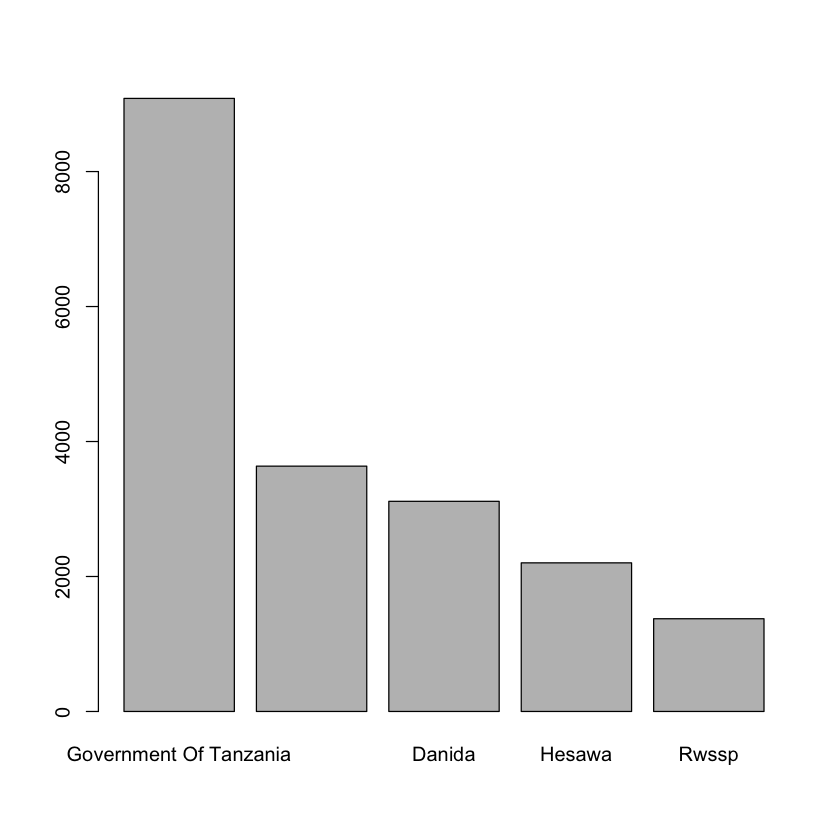

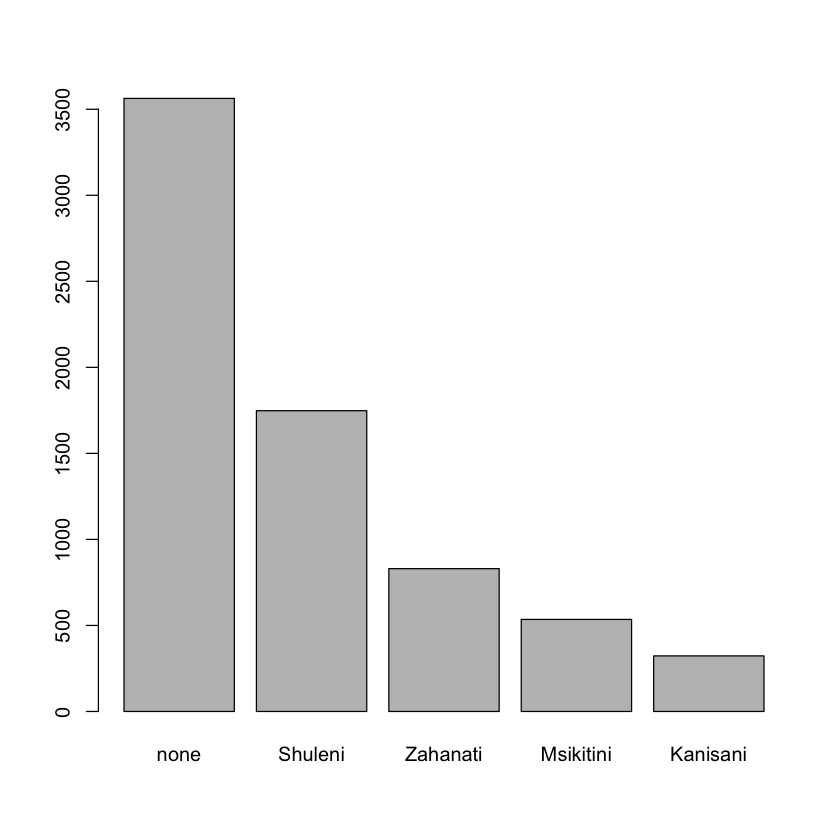

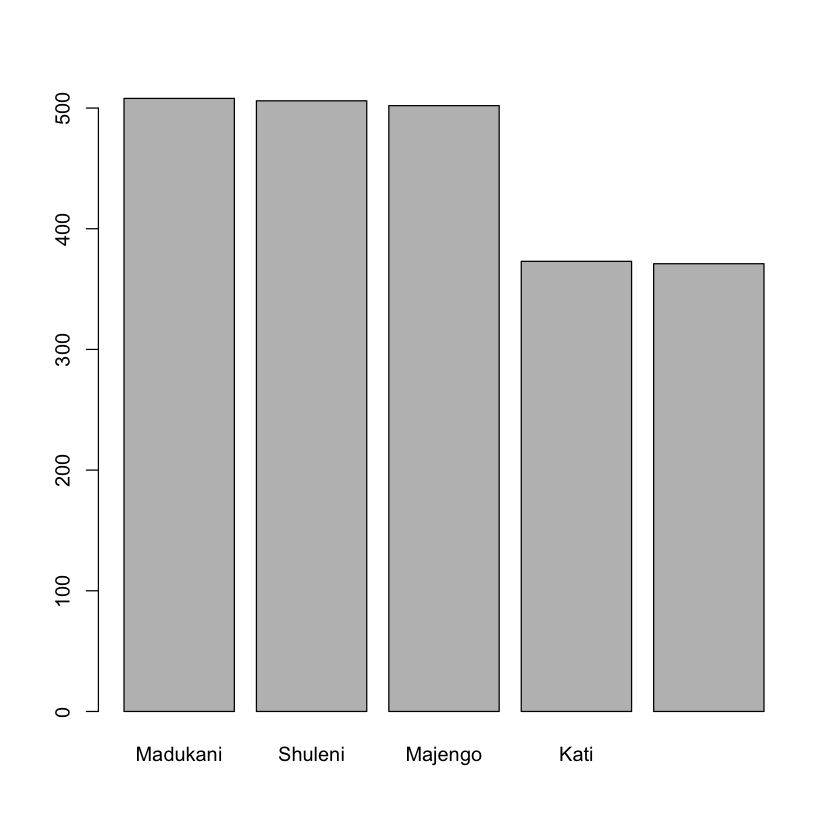

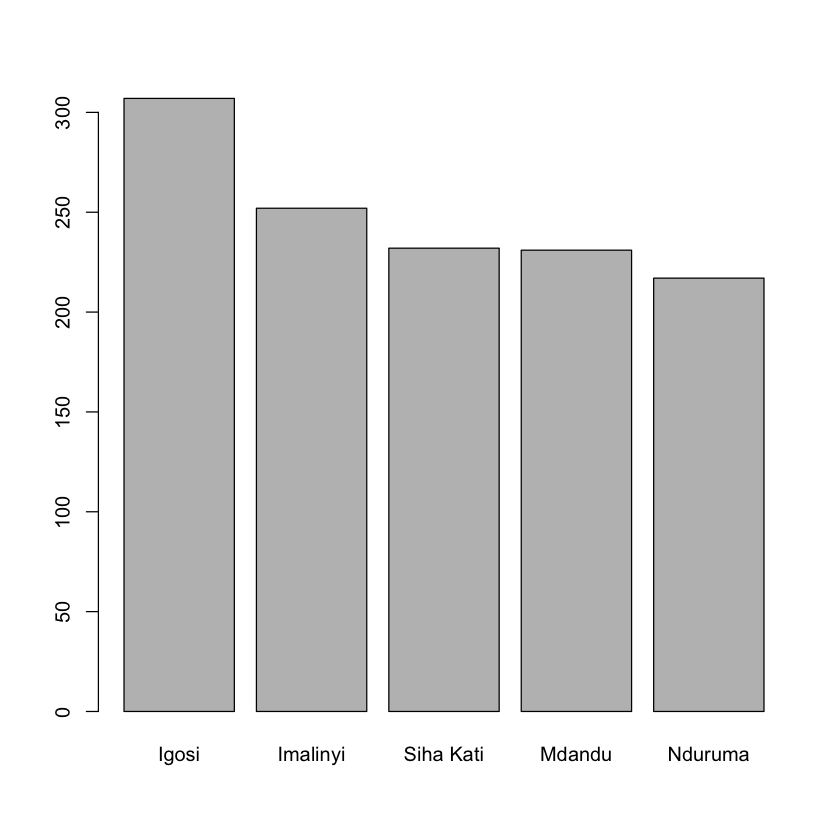

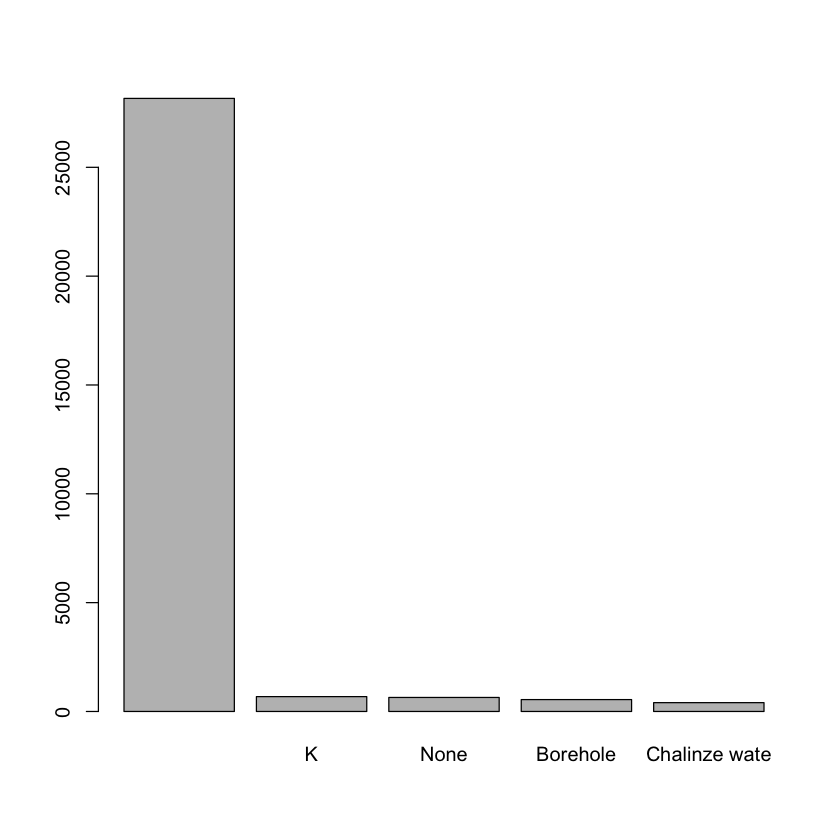

In [27]:
for (f in problematic_features) {
    factors <- table(data[,f])
    barplot( (sort(factors, decreasing=TRUE)[1:5] ))
}

By taking a look at the barplots, some features might be interesting to keep because they have a large dominance in one category. For example, the $installer$ feature contains more than 16000 samples with the category $DWE$ so it might be useful to simply keep track of whether the installer is DWE or not (binary value).

In [28]:
convert_installer_to_binary <- function(df) {
    levels(df$installer) <- c(levels(df$installer), "1","0") 
    df$installer[df$installer == "DWE"] <- 1
    df$installer[df$installer != "1"] <- 0
    df <- transform(df, installer = as.integer(as.character(installer)))
    return(df)
}

By analyzing the rest of the barplots, either there are extremely few samples of each category of the feature, or there are majoritarily samples containing $none$ or an empty string. Therefore, we choose to remove them from the dataset.

In [29]:
remove_features_many_levels <- function(df) {
    df <- subset(df,select=-which(names(df) %in% problematic_features))
    return(df)
}

In [30]:
categorical_variables <- which(sapply(subset(data,select=-c(status_group)),class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"

In [ ]:
install.packages('dummies')

In [31]:
library(dummies)

dummies-1.5.6 provided by Decision Patterns




In [32]:
one_hot_encoding_training <- function(df) {
    categorical_variables <- which(sapply(subset(df,select=-c(status_group)),class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

In [33]:
one_hot_encoding_test <- function(df) {
    categorical_variables <- which(sapply(df,class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

In [41]:
data <- cbind(data[,-categorical_variables],dum)
dim(data)
head(data)

ERROR: Error in data.frame(..., check.names = FALSE): object 'dum' not found


# Feature selection

## mRMR on one-hot encoded data

In [34]:
apply_mrmr_numerical <- function(df) {
    #print(head(df[,ncol(df)]))
    X <- subset(df,select=-c(status_group))
    print(colnames(df))
    dum <- dummy.data.frame(subset(df,select=c(status_group)),names=c("status_group"), sep="_")
    correlation <- numeric(ncol(X))
    #print(head(dum))
    #print(head(dum[,1]))
    for(i in 1:ncol(dum)) {
        correlation <- correlation + abs(cor(X,dum[,i]))
    }
    correlation <- correlation / 3
    #print(correlation)
    n <- ncol(X)
    selected_features <- c()
    candidate_features <- 1:n
    #message(correlation)
    for(j in 1:n) {
        redundancy_score <- numeric(length(candidate_features))
        if (length(selected_features)>0) {
            cor_selected_candidates <- cor(X[,selected_features,drop=F],X[,candidate_features,drop=F])
            redundancy_score <- apply(cor_selected_candidates,2,mean)
        }
        mRMR_score <- correlation[candidate_features] - redundancy_score
        best_candidate <- candidate_features[which.max(mRMR_score)]
        message(best_candidate)
        selected_features<-c(selected_features,best_candidate)
        
        candidate_features <- setdiff(candidate_features,best_candidate)
    }
    return(selected_features)
}

In [35]:
get_k_mrmr_variables <- function(df,k) {
    sorted_features <- apply_mrmr_numerical(df[,1:ncol(df)])    
    df <- df[,sorted_features[1:k]]
    return(df)
}

## mRMR on categorical data

In [36]:
apply_mrmr <- function(X,Y) {
    selected_features <- c()
    n <- ncol(X)
    candidate_features <- 1:n
    correlation <- c()
    for (i in 1:n) {
        chi_value <- chisq.test(X[,i], Y)
        correlation[i] <- chi_value$statistic
    }
    message(correlation)
    correlation <- correlation/max(correlation)
    redundancy_score <- c()
    for(j in 1:n) {
        redundancy_score <- numeric(length(candidate_features))
        if(length(selected_features) > 0) {
            for (c in 1:length(candidate_features)) {
                redundancy_cor <- numeric(length(selected_features))
                for (s in 1:length(selected_features)) {
                    #print(length(X[,selected_features[s]]))
                    #print(length(X[,candidate_features[c]]))
                    chi_value <- chisq.test(X[,selected_features[s]],X[,candidate_features[c]])
                    redundancy_cor[s]  <- chi_value$statistic
                    message(chi_value$statistic)
                }
                message(redundancy_cor)
                redundancy_score[c] <- mean(redundancy_cor)
            }
        }
        #message(redundancy_score)
        mRMR_score <- correlation[candidate_features] - redundancy_score
        #message(mRMR_score)
        #message(candidate_features)
        max_score_candidate <- candidate_features[which.max(mRMR_score)]
        message(max_score_candidate)
        selected_features <- c(selected_features,max_score_candidate)
        candidate_features <- setdiff(candidate_features,max_score_candidate)
    }
    #write(selected_features,"selected_features.txt")
    #print(selected_features)
}

# Call the preprocessing functions

In [37]:
preprocess_training <- function(df) {
    df <- remove_redundant_features(df)
    #df <- create_over_sampling_dataset(df)
    #df <- create_smote_dataset(df)
    df <- remove_useless_features(df)
    df <- create_binary_features(df)
    df <- convert_date_to_numeric(df)
    df <- convert_installer_to_binary(df)
    df <- discard_unrealistic_coordinates(df)
    df <- generate_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_training(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    df_no_status <- get_k_mrmr_variables(df,100)
    df_ordered <- df_no_status[,order(names(df_no_status))]
    #print(head(df_ordered))
    df <- cbind(df_ordered,subset(df,select=c(status_group)))
    write(colnames(subset(df,select=-c(status_group))),"features.txt")
    return(df)
}

In [38]:
preprocess_test <- function(df) {
    df <- remove_useless_features(df)
    df <- convert_date_to_numeric(df)
    #df <- discard_unrealistic_coordinates(df)
    df <- set_existing_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_test(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    features_list <- scan("features.txt",what = " ")
    column_names <- colnames(df)
    #Removing all columns that did not appear in training
    cols_to_remove <- c()
    for(c in 1:ncol(df)) {
        if(!(column_names[c] %in% features_list)) {
            #print(column_names[c])
            cols_to_remove <- c(cols_to_remove,c)
        }
    }
    df <- df[,-cols_to_remove]
    
    #Adding empty columns for missing features
    test_columns <- colnames(df)
    for(c in 1:length(features_list)) {
        if(!(features_list[c] %in% test_columns)) {
            #print(features_list[c])
            df[,features_list[c]] = 0
        }
    }
    df <- df[,order(names(df))]
    return(df)
}

In [39]:
data_preproc <- preprocess_training(data)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

  [1] "id"                                         
  [2] "amount_tsh"                                 
  [3] "date_recorded"                              
  [4] "gps_height"                                 
  [5] "installer"                                  
  [6] "num_private"                                
  [7] "region_code"                                
  [8] "district_code"                              
  [9] "population"                                 
 [10] "public_meeting"                             
 [11] "permit"                                     
 [12] "construction_year"                          
 [13] "source_class"                               
 [14] "status_group"                               
 [15] "region_kmeans"                              
 [16] "basin_Internal"                             
 [17] "basin_Lake_Nyasa"                           
 [18] "basin_Lake_Rukwa"                           
 [19] "basin_Lake_Tanganyika"                      
 [20] "basin

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
218

219

220

221

172

167

180

237

232

233

235

182

179

226

27

205

208

204

171

216

217

214

203

74

195

193

229

228

230

181

4

7

176

197

133

24

170

225

13

29

47

227

22

16

17

43

222

21

59

147

209

190

10

137

186

196

70

31

19

98

36

23

34

18

20

15

39

236

57

166

127

11

49

206

33

223

100

89

26

2

46

71

177

8

162

67

94

102

138

99

45

58

184

54

88

97

142

25

85

12

28

41

84

148

51

44

130

105

40

125

117

30

140

121

38

157

139

134

109

163

107

108

82

80

164

129

5

156

123

104

189

188

115

131

112

155

165

192

60

141

101

126

35

136

50

143

95

14

32

62

48

68

122

160

154

75

168

55

64

119

53

66

175

173

211

83

116

111

37

92

96

3

72

86

87

76

77

113

200

202

198

201

145

93

103

110

69

61

78

213

231

224

128



,amount_tsh,basin_Internal,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_/_Southern_Coast,basin_Wami_/_Ruvu,construction_year,district_code,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_rope_pump,extraction_type_class_wind-powered,extraction_type_group_afridev,extraction_type_group_india_mark_iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_rope_pump,extraction_type_group_submersible,extraction_type_group_wind-powered,gps_height,⋯,region_Manyara,region_Mara,region_Morogoro,region_Pwani,region_Singida,region_Tanga,region_code,region_kmeans,source_class,source_hand_dtw,source_lake,source_machine_dbh,source_rainwater_harvesting,source_river,source_shallow_well,water_quality_milky,water_quality_salty_abandoned,water_quality_soft,water_quality_unknown,waterpoint_type_cattle_trough,waterpoint_type_communal_standpipe,waterpoint_type_dam,waterpoint_type_hand_pump,waterpoint_type_improved_spring,status_group
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
2,0,0,0,0,0,0,0,1,0,0,2008,4,0,0,0,1,0,0,0,0,0,1,0,0,1978,⋯,0,0,0,0,0,0,11,7,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,functional
3,0,0,0,0,0,0,0,0,0,1,0,4,0,0,1,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,1,3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,functional
4,10,0,0,0,0,0,1,0,0,0,1999,5,1,0,0,0,0,0,0,0,0,0,0,0,1639,⋯,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
5,0,0,0,0,0,0,0,0,0,1,0,4,0,1,0,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,1,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,non functional
6,50,0,0,0,0,0,0,0,0,1,0,43,0,0,0,0,0,0,0,0,0,0,1,0,28,⋯,0,0,0,1,0,0,60,3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,functional
7,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,17,2,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,non functional


[1] 51596   101

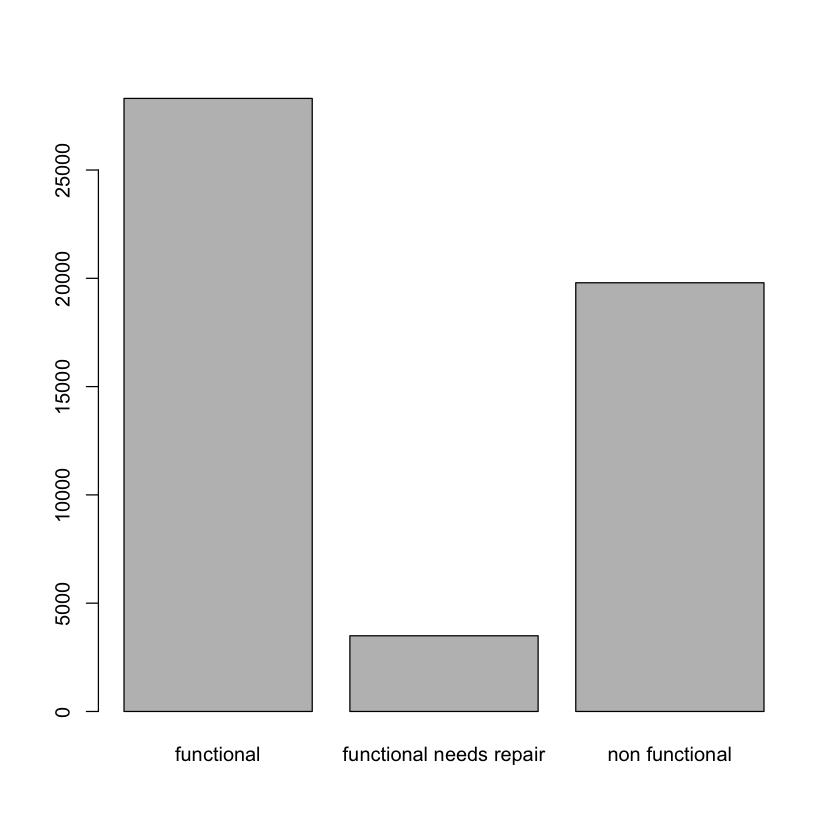

In [40]:
head(data_preproc)
dim(data_preproc)
barplot(table(data_preproc$status_group))

In [41]:
test_preproc <- preprocess_test(eval_data)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

In [42]:
dim(test_preproc)

[1] 14850   100

In [43]:
train_cols <- colnames(data_preproc)
for(c in colnames(test_preproc)) {
    if(!(c %in% train_cols)) {
        print(c)
    }
}

## Feature engineering

## Feature selection

# Model selection

## Model 1


In [34]:
library("nnet")

In [ ]:
# install.packages("nnet")
accuracyFromConfusionMatrix <- function(confusion_matrix){
   
    full_confusion_matrix <-matrix(c(0,0), nrow = 3, ncol = 3)
    colnames(full_confusion_matrix) <- colnames(confusion_matrix)
    rownames(full_confusion_matrix) <- colnames(confusion_matrix)
    size <- dim(confusion_matrix)[1]
    for(i in size){
        full_confusion_matrix[rownames(confusion_matrix)[i],] <- confusion_matrix[i,]
    }
    print(full_confusion_matrix)
    return((full_confusion_matrix[1,1]+full_confusion_matrix[2,2]+full_confusion_matrix[3,3])/sum(full_confusion_matrix))
}


computeResults <- function(Y,Y_hat,explanatory_string="",verbose=TRUE){
 
    confusion_matrix <- table(Y_hat,Y)
    accuracy <- accuracyFromConfusionMatrix(confusion_matrix)
    misclassification_rate <- 1 - accuracy
    
    if(verbose){
        print(paste("[INFO] - Confusion matrix",explanatory_string,":"))
        print(confusion_matrix)
        print(paste("[INFO] - Accuracy",explanatory_string,":",accuracy))
        print(paste("[INFO] - Misclassification rate",explanatory_string,":",misclassification_rate))
    }
    
    return(accuracy)
}
BaggingNN <- function(hidden_nodes=2,n_bagging_resamples=1){
    data <- data_preproc
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    set.seed(1717)
    data_idx <- sample(1:nrow(data))
    
    # 2. Split shuffled dataset into training and test set
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]

    n_train <- length(train_data)
    Y_pred_models<-numeric()
    Y_hat_bagged<-array(0,c(length(test_data),1))
    Y <- test_data[,target_variable]
    accuracy_vec<-array(0,c(1,n_bagging_resamples))

    for (i in 1:n_bagging_resamples)
    {
      # 1. Resample data from the training set
      I_bag <- sample(seq(1,n_train),replace=TRUE)
      # 2. Fit model
      model <- nnet (status_group ~ .,train_data[I_bag,],skip=FALSE,
                       size=hidden_nodes, maxit=100,trace=F,rang=0.2,MaxNWts=150000)

      Y_pred <- predict(model,test_data[,-target_variable])
    
      result_classification <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
#       result_classification[1] <- "functional needs repair"
#       result_classification[2] <- "non functional"
      Y_pred_models <- cbind(Y_pred_models,result_classification)
      accuracy_vec[i] <- computeResults(Y,result_classification,paste(i,"th model"),verbose=F)
    }


   
#     # 3. Majority vote of the classifiers to make the prediction

     Y_hat_bagged <- apply(Y_pred_models,1,function(x) names(which.max(table(x))))
     Y <- test_data[,target_variable]

     accuracy_bag <- computeResults(Y,Y_hat_bagged,"bagged model")
     print(accuracy_bag)
     model_single_out <- nnet(status_group ~ ., data=train_data,size=hidden_nodes,trace=F,skip=FALSE,maxit=100,rang=0.2,MaxNWts=150000)
     Y_pred_single_out <- predict(model_single_out,test_data[,-target_variable])
     Y_hat_single_out <- colnames(Y_pred_single_out)[max.col(Y_pred,ties.method="first")]
     accuracy_single_out <- computeResults(Y,Y_hat_single_out,"single model")
     return(list(accuracy_bagged=accuracy_bag,accuracy_simple=accuracy_single_out,bagging_accuracies=accuracy_vec))
}


results <- BaggingNN(hidden_nodes=128,n_bagging_resamples=5)

In [40]:
data <- data_preproc[1:50,]
half_split <- floor(nrow(data)/2)
target_variable <- ncol(data)
accuracy_vec <- c()

# 1. Shuffle the dataset randomly.
set.seed(1717)
data_idx <- sample(1:nrow(data))

# 2. Split shuffled dataset into training and test set
train_data <- data[data_idx[1:half_split],]
test_data <- data[data_idx[(half_split+1):nrow(data)],]

model_single_out <- nnet(status_group ~ ., data=train_data,size=15,trace=F,skip=FALSE,maxit=100,rang=0.2,MaxNWts = 215043)
Y_pred_single_out <- predict(model_single_out,test_data[,-target_variable])
Y_hat_single_out <- colnames(Y_pred_single_out)[max.col(Y_pred,ties.method="first")]
accuracy_single_out <- computeResults(Y,Y_hat_single_out,"single model")

Warning message in nnet.formula(status_group ~ ., data = train_data, size = 15, :
“group ‘functional needs repair’ is empty”


ERROR: Error in as.matrix(m): object 'Y_pred' not found


## Model 2


The second model that was implemented is a Random Forest. A hyperparameter of this model is the number of trees that is used. Different values for this hyperparameter were therefore tested in order to find the ont yielding the best solution in terms of accuracy.

In [45]:
library("randomForest")

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [47]:
n_trees <- c(14)
data <- data_preproc
accuracy_vec <- array(0,length(n_trees))
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
target_variable <- ncol(data)
index <- 1
best_accuracy <- 0

for (i in n_trees){
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    
    model <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=i,keep.forest=TRUE)
    print(model$test$confusion)
    accuracy_vec[index] = (model$test$confusion[1,1]+model$test$confusion[2,2]+model$test$confusion[3,3])/sum(model$test$confusion)
    if(accuracy_vec[index] > best_accuracy) {
        best_model_ <- model
        best_accuracy <- accuracy_vec[index]
    }
    index <- index + 1
}
accuracy_vec

                        functional functional needs repair non functional
functional                    8841                     388            760
functional needs repair       1101                    5603            331
non functional                1891                     259           4767
                        class.error
functional                0.1149264
functional needs repair   0.2035537
non functional            0.3108284


[1] 0.8024099

[1] 0.7889748 0.8021242 0.8039193 0.8083859 0.8096800 0.8123099 0.8167766
 [8] 0.8126021 0.8156078 0.8140633 0.8162339 0.8170270 0.8171105 0.8175697
[15] 0.8148146

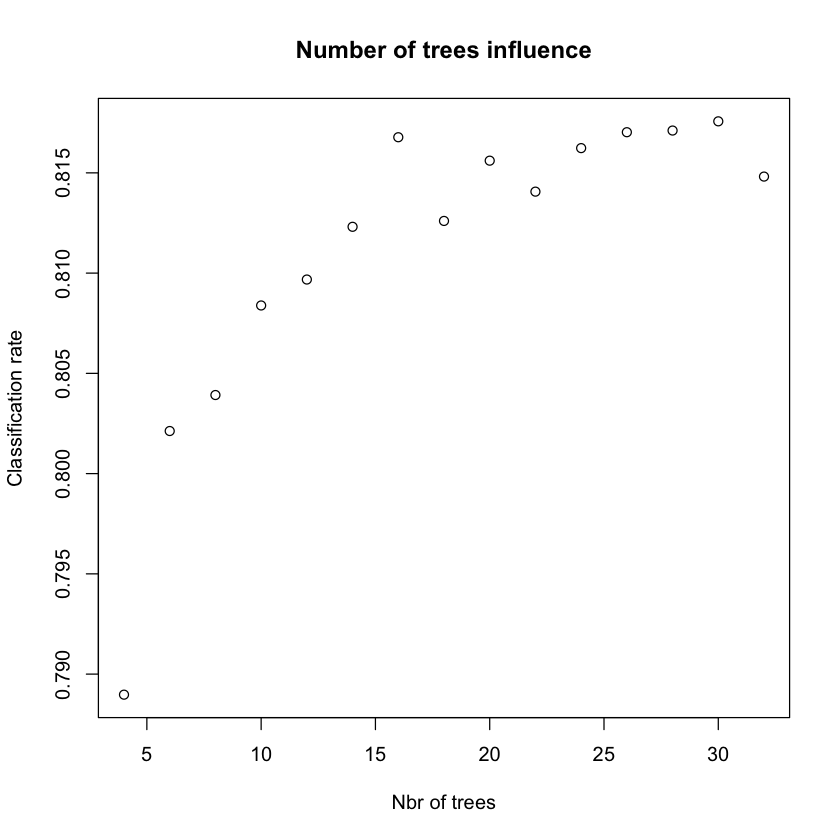

In [85]:
accuracy_vec
plot( c(4,6,8,10,12,14,16,18,20,22,24,26,28,30,32),accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate")

In [59]:
Y_pred <- predict(best_model_,newdata = test_preproc)

In [65]:
res <- cbind("id"=test_preproc$id,"status_group"=as.character(Y_pred))

In [66]:
head(test_preproc,30)

,amount_tsh,basin_Lake_Nyasa,basin_Lake_Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_/_Southern_Coast,date_recorded,district_code,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_group_afridev,extraction_type_group_gravity,extraction_type_group_india_mark_ii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_submersible,extraction_type_group_swn_80,gps_height,id,installer,lga_Bagamoyo,⋯,quantity_unknown,region_Dodoma,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Mbeya,region_Mtwara,region_Mwanza,region_Ruvuma,region_Shinyanga,region_code,source_class,source_machine_dbh,source_river,source_shallow_well,source_spring,water_quality_milky,water_quality_salty,water_quality_soft,water_quality_unknown,waterpoint_type_communal_standpipe,waterpoint_type_communal_standpipe_multiple,waterpoint_type_hand_pump,waterpoint_type_improved_spring
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,15740,3,0,0,0,1,0,0,0,0,0,0,1,0,0,1996,50785,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,15740,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1569,51630,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,15737,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1567,17168,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,15727,43,0,0,0,1,0,0,0,0,0,0,1,0,0,267,45559,0,0,⋯,0,0,0,0,0,1,0,0,0,0,0,80,0,0,0,1,0,0,0,1,0,0,0,0,0
5,500,0,0,0,0,1,15791,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1260,49871,0,0,⋯,0,0,0,0,0,0,0,0,0,1,0,10,0,0,0,0,1,0,0,1,0,1,0,0,0
6,0,0,0,1,0,0,15768,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1685,52449,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,1,0,0,0
7,0,0,0,0,1,0,15035,7,0,1,0,0,0,0,0,1,0,0,0,0,0,550,24806,0,0,⋯,0,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,0,1,15730,4,0,0,0,0,1,0,0,0,0,0,0,1,0,234,28965,0,0,⋯,0,0,0,0,0,0,0,1,0,0,0,9,0,1,0,0,0,0,0,1,0,0,1,0,0
9,30,0,0,0,0,1,15728,33,1,0,0,0,0,0,1,0,0,0,0,0,0,584,36301,0,0,⋯,0,0,0,0,0,0,0,1,0,0,0,90,0,0,0,0,1,0,0,1,0,1,0,0,0


In [67]:
head(res,30)

id,status_group
50785,non functional
51630,functional
17168,non functional
45559,non functional
49871,functional needs repair
52449,functional
24806,non functional
28965,non functional
36301,non functional
54122,functional needs repair


In [62]:
write.csv(res,"submission.csv",row.names=FALSE)

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


# Alternative models





## Gradient boosting

In [38]:
require(gbm)

Loading required package: gbm

Loaded gbm 2.1.8



In [68]:
data <- data_preproc
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
train_data <- data[data_idx[1:half_split],]
test_data <- data[data_idx[(half_split+1):nrow(data)],]
target_variable <- ncol(data)

boost <- gbm(status_group ~ . ,data = train_data,distribution = "multinomial",cv.folds = 5,n.trees = 1000,shrinkage = 0.01, interaction.depth = 10)
boost
summary(boost)
best_iter <- gbm.perf(boost, method = "cv")
best_iter


Warning message:
“Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk.”


In [51]:
n.trees = seq(from=100 ,to=10000, by=100)
predmatrix<-predict(boost,test_data[,-target_variable],n.trees = n.trees)
dim(predmatrix) #dimentions of the Prediction Matrix
#Calculating The Mean squared Test Error
test.error<-with(test_data[,-target_variable],apply( (predmatrix-status_group)^2,2,mean))
head(test.error) #contains the Mean squared test error for each of the 100 trees averaged


Warning message in predict.gbm(boost, test_data[, -target_variable], n.trees = n.trees):
“Number of trees not specified or exceeded number fit so far. Using 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100.”


[1] 28393   100

ERROR: Error in apply((predmatrix - status_group)^2, 2, mean): object 'status_group' not found


In [139]:
require(caret)

In [174]:
data <- data_preproc
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
train_data <- data[data_idx[1:half_split],]
test_data <- data[data_idx[(half_split+1):nrow(data)],]
target_variable <- ncol(data)

fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)

gbmGrid <-  expand.grid(interaction.depth = 3, 
                        n.trees = 2000, 
                        shrinkage = 0.01,n.minobsinnode = 1)
                        
nrow(gbmGrid)

set.seed(825)
gbmFit2 <- train(status_group ~ ., data = train_data, 
                 method = "gbm", 
                 verbose = TRUE, 
                 trControl = fitControl,
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = gbmGrid)
gbmFit2

[1] 1

In [ ]:
confusionMatrix(gbmFit2)

In [ ]:
mPred = predict(gbmFit2, test_data, na.action = na.pass)
postResample(mPred, test_data$status_group)

In [ ]:
confusionMatrix(mPred, test_data$status_group)

In [42]:
install.packages("xgboost")


The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpFiWOhY/downloaded_packages


In [45]:
require(xgboost)

In [47]:
data <- data_preproc
#print(head(data))
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
train_data <- data[data_idx[1:half_split],]
test_data <- data[data_idx[(half_split+1):nrow(data)],]
target_variable <- ncol(data)
labels <- as.matrix(as.numeric(train_data[,target_variable])) - 1

best_param = list()
best_seednumber = 1234
best_loss = Inf
best_loss_index = 0

for (iter in 1:10) {
    param <- list(objective = "multi:softprob",
        eval_metric = "merror",
        num_class = 3,
        max_depth = sample(10:30, 1),
        eta = runif(1, .01, .3),
        gamma = runif(1, 0.0, 0.2),
        subsample = runif(1, .6, .9),
        colsample_bytree = runif(1, .5, .8), 
        min_child_weight = sample(1:40, 1),
        max_delta_step = sample(1:10, 1)
    )
    seed.number <- sample.int(10000, 1)[[1]]
    set.seed(seed.number)

    cv.nround <- 100
    cv.nfold <- 5

    bstSparse <- xgb.cv(data = as.matrix(train_data[,-target_variable]),label=labels,params = param,
                        nthread=6, nfold=cv.nfold, nrounds=cv.nround,verbose = T,early_stoppping_rounds=8, maximize=FALSE)
    
    #print(typeof(bstSparse))
    #print(bstSparse)
    #print("OKOK")
    #print(bstSparse[1])
    #print("OKOKOKOKO")
    min_loss <-  min(bstSparse$evaluation_log$test_merror_mean)
    min_loss_index  <- which.min(bstSparse$evaluation_log$test_merror_mean)
    message(min_loss_index)
    #print(bstSparse$evaluation_log)
    
    if (min_loss < best_loss) {
        best_loss <- min_loss
        best_loss_index <- min_loss_index
        best_seednumber <- seed.number
        best_param <- param
    }
}




[1]	train-merror:0.242829+0.014468	test-merror:0.264788+0.013705 
[2]	train-merror:0.225085+0.007641	test-merror:0.248198+0.007820 
[3]	train-merror:0.217226+0.004327	test-merror:0.241414+0.003692 
[4]	train-merror:0.214067+0.002720	test-merror:0.238972+0.004392 
[5]	train-merror:0.210452+0.001894	test-merror:0.237615+0.004648 
[6]	train-merror:0.209202+0.002558	test-merror:0.237770+0.006069 
[7]	train-merror:0.206799+0.002648	test-merror:0.236568+0.006170 
[8]	train-merror:0.205946+0.002110	test-merror:0.234902+0.005716 
[9]	train-merror:0.204560+0.002863	test-merror:0.233816+0.005326 
[10]	train-merror:0.202380+0.002223	test-merror:0.233312+0.004958 
[11]	train-merror:0.201033+0.002173	test-merror:0.232421+0.004850 
[12]	train-merror:0.199812+0.001454	test-merror:0.231685+0.004298 
[13]	train-merror:0.197738+0.002135	test-merror:0.231219+0.003451 
[14]	train-merror:0.196585+0.001879	test-merror:0.231413+0.003553 
[15]	train-merror:0.195131+0.001825	test-merror:0.230483+0.003775 
[16]

99



[1]	train-merror:0.265689+0.004859	test-merror:0.275642+0.009341 
[2]	train-merror:0.252268+0.005468	test-merror:0.263471+0.008071 
[3]	train-merror:0.244399+0.005077	test-merror:0.254671+0.007691 
[4]	train-merror:0.241734+0.002377	test-merror:0.252036+0.008119 
[5]	train-merror:0.236501+0.002732	test-merror:0.249555+0.007615 
[6]	train-merror:0.233933+0.002868	test-merror:0.248470+0.006974 
[7]	train-merror:0.231559+0.002284	test-merror:0.246531+0.004740 
[8]	train-merror:0.229340+0.002700	test-merror:0.245252+0.004439 
[9]	train-merror:0.227343+0.002503	test-merror:0.244477+0.005858 
[10]	train-merror:0.226529+0.002266	test-merror:0.242461+0.004447 
[11]	train-merror:0.224591+0.002152	test-merror:0.241453+0.005993 
[12]	train-merror:0.222895+0.001698	test-merror:0.239825+0.004740 
[13]	train-merror:0.221093+0.002016	test-merror:0.238585+0.004635 
[14]	train-merror:0.220134+0.001972	test-merror:0.238158+0.004116 
[15]	train-merror:0.218234+0.002136	test-merror:0.236414+0.004668 
[16]

98



[1]	train-merror:0.269788+0.007870	test-merror:0.280216+0.012636 
[2]	train-merror:0.257171+0.010657	test-merror:0.268974+0.010195 
[3]	train-merror:0.252530+0.009328	test-merror:0.265795+0.009993 
[4]	train-merror:0.247887+0.008529	test-merror:0.260717+0.007491 
[5]	train-merror:0.241656+0.003989	test-merror:0.252694+0.003725 
[6]	train-merror:0.238158+0.002228	test-merror:0.249050+0.002994 
[7]	train-merror:0.235667+0.001961	test-merror:0.247112+0.004091 
[8]	train-merror:0.234631+0.001629	test-merror:0.245988+0.004641 
[9]	train-merror:0.232218+0.002384	test-merror:0.244399+0.003840 
[10]	train-merror:0.231849+0.001824	test-merror:0.244128+0.003213 
[11]	train-merror:0.230551+0.001741	test-merror:0.243507+0.004280 
[12]	train-merror:0.229165+0.001951	test-merror:0.242732+0.004662 
[13]	train-merror:0.228700+0.001657	test-merror:0.242926+0.003338 
[14]	train-merror:0.227934+0.001383	test-merror:0.242267+0.004387 
[15]	train-merror:0.226423+0.001249	test-merror:0.241453+0.004757 
[16]

100



[1]	train-merror:0.162823+0.007791	test-merror:0.246531+0.009264 
[2]	train-merror:0.145118+0.005869	test-merror:0.236142+0.007086 
[3]	train-merror:0.138567+0.008703	test-merror:0.231297+0.007412 
[4]	train-merror:0.129758+0.005467	test-merror:0.230677+0.007106 
[5]	train-merror:0.124506+0.004510	test-merror:0.227731+0.007452 
[6]	train-merror:0.119263+0.004367	test-merror:0.226064+0.006147 
[7]	train-merror:0.114834+0.004514	test-merror:0.226490+0.005721 
[8]	train-merror:0.110561+0.004231	test-merror:0.225715+0.005357 
[9]	train-merror:0.106937+0.003694	test-merror:0.224591+0.003768 
[10]	train-merror:0.102537+0.004458	test-merror:0.224746+0.004791 
[11]	train-merror:0.099145+0.004628	test-merror:0.223893+0.003985 
[12]	train-merror:0.095540+0.004073	test-merror:0.224358+0.003942 
[13]	train-merror:0.091742+0.003257	test-merror:0.225328+0.004498 
[14]	train-merror:0.088757+0.003308	test-merror:0.225095+0.004032 
[15]	train-merror:0.086402+0.002751	test-merror:0.225327+0.004342 
[16]

11



[1]	train-merror:0.266610+0.005286	test-merror:0.276067+0.008833 
[2]	train-merror:0.254283+0.002329	test-merror:0.261260+0.005059 
[3]	train-merror:0.248614+0.002424	test-merror:0.258237+0.003603 
[4]	train-merror:0.244089+0.000936	test-merror:0.254438+0.003848 
[5]	train-merror:0.241511+0.002578	test-merror:0.251648+0.003925 
[6]	train-merror:0.239873+0.001935	test-merror:0.250252+0.000995 
[7]	train-merror:0.237150+0.001800	test-merror:0.249515+0.001947 
[8]	train-merror:0.235009+0.001289	test-merror:0.248159+0.001634 
[9]	train-merror:0.234417+0.001104	test-merror:0.247616+0.002647 
[10]	train-merror:0.232547+0.000825	test-merror:0.246841+0.002356 
[11]	train-merror:0.230822+0.000772	test-merror:0.245678+0.003239 
[12]	train-merror:0.229523+0.001232	test-merror:0.244670+0.002550 
[13]	train-merror:0.228070+0.001212	test-merror:0.243275+0.002814 
[14]	train-merror:0.227363+0.001125	test-merror:0.242732+0.002877 
[15]	train-merror:0.225638+0.001309	test-merror:0.242112+0.002484 
[16]

99



[1]	train-merror:0.230308+0.003203	test-merror:0.254206+0.006308 
[2]	train-merror:0.217556+0.003433	test-merror:0.243507+0.001885 
[3]	train-merror:0.211567+0.003036	test-merror:0.239050+0.003262 
[4]	train-merror:0.208078+0.002383	test-merror:0.236995+0.002007 
[5]	train-merror:0.204328+0.001709	test-merror:0.233855+0.001808 
[6]	train-merror:0.201479+0.001225	test-merror:0.232693+0.002087 
[7]	train-merror:0.198417+0.001335	test-merror:0.230987+0.002742 
[8]	train-merror:0.195354+0.001106	test-merror:0.230754+0.003268 
[9]	train-merror:0.192447+0.000974	test-merror:0.229398+0.002942 
[10]	train-merror:0.190257+0.000722	test-merror:0.228816+0.002087 
[11]	train-merror:0.187738+0.001089	test-merror:0.228041+0.001978 
[12]	train-merror:0.185150+0.001204	test-merror:0.226762+0.002363 
[13]	train-merror:0.182911+0.001430	test-merror:0.226723+0.002202 
[14]	train-merror:0.180440+0.001176	test-merror:0.225754+0.003134 
[15]	train-merror:0.178366+0.001502	test-merror:0.223816+0.002204 
[16]

75



[1]	train-merror:0.260447+0.005406	test-merror:0.269750+0.003966 
[2]	train-merror:0.249283+0.003183	test-merror:0.258509+0.004249 
[3]	train-merror:0.245281+0.002808	test-merror:0.254361+0.004452 
[4]	train-merror:0.242722+0.001599	test-merror:0.253121+0.004063 
[5]	train-merror:0.240581+0.002469	test-merror:0.250601+0.005291 
[6]	train-merror:0.238206+0.002392	test-merror:0.248702+0.004627 
[7]	train-merror:0.237470+0.002588	test-merror:0.247345+0.003601 
[8]	train-merror:0.235542+0.002341	test-merror:0.246492+0.004416 
[9]	train-merror:0.233516+0.002020	test-merror:0.246221+0.004336 
[10]	train-merror:0.232227+0.001728	test-merror:0.245174+0.004279 
[11]	train-merror:0.230396+0.001899	test-merror:0.243701+0.003934 
[12]	train-merror:0.228351+0.001691	test-merror:0.242034+0.004545 
[13]	train-merror:0.227081+0.001763	test-merror:0.241841+0.003763 
[14]	train-merror:0.225822+0.001595	test-merror:0.240290+0.003052 
[15]	train-merror:0.224639+0.001051	test-merror:0.239166+0.003813 
[16]

96



[1]	train-merror:0.190208+0.007001	test-merror:0.257927+0.006677 
[2]	train-merror:0.168511+0.004689	test-merror:0.240406+0.009313 
[3]	train-merror:0.159809+0.007918	test-merror:0.235212+0.006156 
[4]	train-merror:0.153907+0.006851	test-merror:0.232305+0.004840 
[5]	train-merror:0.148984+0.006624	test-merror:0.229785+0.004996 
[6]	train-merror:0.142927+0.004902	test-merror:0.227304+0.005918 
[7]	train-merror:0.138480+0.002642	test-merror:0.227188+0.005720 
[8]	train-merror:0.134245+0.002157	test-merror:0.226529+0.005853 
[9]	train-merror:0.130718+0.001142	test-merror:0.224475+0.006458 
[10]	train-merror:0.127054+0.001220	test-merror:0.224126+0.005364 
[11]	train-merror:0.124389+0.001372	test-merror:0.223544+0.006302 
[12]	train-merror:0.120775+0.002018	test-merror:0.223738+0.006205 
[13]	train-merror:0.118575+0.001528	test-merror:0.223777+0.005666 
[14]	train-merror:0.115145+0.000606	test-merror:0.223467+0.005622 
[15]	train-merror:0.112673+0.001109	test-merror:0.223467+0.005281 
[16]

19



[1]	train-merror:0.261057+0.004478	test-merror:0.270137+0.010275 
[2]	train-merror:0.252665+0.005439	test-merror:0.260795+0.011679 
[3]	train-merror:0.247684+0.003586	test-merror:0.258856+0.012543 
[4]	train-merror:0.244486+0.003496	test-merror:0.255484+0.011454 
[5]	train-merror:0.243546+0.003795	test-merror:0.255019+0.011714 
[6]	train-merror:0.241559+0.003623	test-merror:0.253507+0.009987 
[7]	train-merror:0.239699+0.003414	test-merror:0.252926+0.010503 
[8]	train-merror:0.238294+0.002681	test-merror:0.250639+0.010338 
[9]	train-merror:0.236220+0.003046	test-merror:0.248391+0.008624 
[10]	train-merror:0.234524+0.002306	test-merror:0.247112+0.010086 
[11]	train-merror:0.233158+0.001976	test-merror:0.245639+0.010248 
[12]	train-merror:0.232130+0.002284	test-merror:0.245794+0.009516 
[13]	train-merror:0.230619+0.002871	test-merror:0.244902+0.010025 
[14]	train-merror:0.229621+0.002215	test-merror:0.244476+0.009566 
[15]	train-merror:0.228467+0.002279	test-merror:0.244011+0.010337 
[16]

100



[1]	train-merror:0.165119+0.003811	test-merror:0.245949+0.002645 
[2]	train-merror:0.146068+0.005287	test-merror:0.231607+0.002159 
[3]	train-merror:0.137520+0.006756	test-merror:0.228428+0.004084 
[4]	train-merror:0.129109+0.004583	test-merror:0.225560+0.004756 
[5]	train-merror:0.122829+0.003588	test-merror:0.222459+0.004653 
[6]	train-merror:0.119728+0.003530	test-merror:0.220870+0.004166 
[7]	train-merror:0.113953+0.002299	test-merror:0.220637+0.003867 
[8]	train-merror:0.108381+0.001582	test-merror:0.221606+0.004458 
[9]	train-merror:0.104824+0.002566	test-merror:0.220249+0.003588 
[10]	train-merror:0.102304+0.002545	test-merror:0.220482+0.003710 
[11]	train-merror:0.098040+0.002005	test-merror:0.220249+0.002801 
[12]	train-merror:0.094213+0.002168	test-merror:0.220133+0.003748 
[13]	train-merror:0.091180+0.002210	test-merror:0.221102+0.003215 
[14]	train-merror:0.088621+0.002221	test-merror:0.221180+0.004370 
[15]	train-merror:0.086276+0.002470	test-merror:0.221141+0.003543 
[16]

12



In [48]:
nround <- best_loss_index
set.seed(best_seednumber)
md <- xgboost(data = as.matrix(train_data[,-target_variable]),label=labels, params=best_param, nrounds=nround, nthread=6)


[1]	train-merror:0.256842 
[2]	train-merror:0.246918 
[3]	train-merror:0.241802 
[4]	train-merror:0.237150 
[5]	train-merror:0.233429 
[6]	train-merror:0.231064 
[7]	train-merror:0.226452 
[8]	train-merror:0.224940 
[9]	train-merror:0.222885 
[10]	train-merror:0.221955 
[11]	train-merror:0.219552 
[12]	train-merror:0.218040 
[13]	train-merror:0.215017 
[14]	train-merror:0.212962 
[15]	train-merror:0.211218 
[16]	train-merror:0.210869 
[17]	train-merror:0.209822 
[18]	train-merror:0.209125 
[19]	train-merror:0.207032 
[20]	train-merror:0.206411 
[21]	train-merror:0.204473 
[22]	train-merror:0.203233 
[23]	train-merror:0.202845 
[24]	train-merror:0.200597 
[25]	train-merror:0.199434 
[26]	train-merror:0.198775 
[27]	train-merror:0.198853 
[28]	train-merror:0.197690 
[29]	train-merror:0.197380 
[30]	train-merror:0.196721 
[31]	train-merror:0.195829 
[32]	train-merror:0.194976 
[33]	train-merror:0.193891 
[34]	train-merror:0.192379 
[35]	train-merror:0.191255 
[36]	train-merror:0.190868 
[

In [49]:
pred <- predict(md, as.matrix(test_data[,-target_variable]),reshape = T)
head(pred)

0.935610414,0.005413178,0.058976393
0.004303019,0.006507771,0.989189148
0.976080000,0.021144439,0.002775531
0.003855786,0.000503138,0.995641112
0.396972805,0.066021912,0.537005246
0.967396975,0.003912926,0.028690113


In [50]:
predicted_labels <- factor(max.col(pred),levels=1:3)
real_labels <- factor(as.numeric(test_data[,target_variable]))
predicted_labels

[1] 1 3 1 3 3 1 1 1 1 1 1 3 1 1 1 3 1 3 3 1 1 3 3 1 1 1 3 1 3 1 1 3 1 3 1 1
   [37] 3 1 3 3 3 3 1 1 1 3 3 3 1 3 3 1 3 1 3 1 3 1 1 3 2 1 1 1 1 1 1 2 1 1 3 1
   [73] 2 3 3 1 3 1 1 1 1 1 1 3 3 3 3 1 1 2 1 3 1 2 2 3 1 1 3 1 1 3 1 3 1 1 1 3
  [109] 1 1 1 1 1 1 3 1 3 1 1 1 1 1 3 1 2 1 1 1 3 1 2 3 1 1 3 1 1 1 3 3 1 3 3 1
  [145] 3 1 3 3 1 1 2 1 3 3 1 3 1 3 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1
  [181] 3 1 3 1 3 3 1 3 1 1 3 1 1 3 3 3 1 1 1 1 3 1 1 1 1 1 1 1 3 3 1 3 1 1 3 3
  [217] 3 1 3 1 1 1 1 1 1 1 1 1 3 3 1 1 1 3 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 3 1
  [253] 3 1 3 1 1 1 1 1 3 3 3 1 1 1 1 1 3 3 1 1 3 1 1 1 3 1 1 1 3 3 1 1 1 3 1 3
  [289] 1 1 1 1 3 3 3 2 3 1 3 3 1 1 3 3 3 3 3 1 1 3 3 3 3 1 1 1 1 3 1 1 1 1 3 1
  [325] 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 3 1 1 1 3 1 1 1 3 1 1 1
  [361] 1 1 3 3 1 3 1 3 3 1 3 1 3 1 1 1 3 3 1 3 3 1 3 1 1 1 1 3 2 1 3 1 1 1 1 1
  [397] 3 1 3 1 1 3 1 3 1 3 1 1 1 3 2 3 3 1 3 1 1 1 3 1 3 3 1 1 1 1 1 3 1 3 3 1
  [433] 3 3 1 3 1 1 3 3 3 1 3 1 1 1 3 3 1 3 1 3 3 3 1 3 1 3 1 3 1 1 3 1 1 1 3 3
  [469] 1 1 1 1 1 1 1 3 1 1 1 3 3 1 3 1 1 1 1 1 1 3 1 1 1 3 3 1 3 3 1 1 3 1 3 1
  [505] 3 3 1 1 3 1 3 1 1 1 1 3 3 1 3 1 1 3 3 3 1 1 3 3 3 3 3 1 3 1 1 3 1 1 1 1
  [541] 3 3 1 3 1 3 1 3 1 3 1 1 1 1 3 3 2 1 1 3 3 3 1 1 1 1 2 3 3 1 3 1 3 3 3 3
  [577] 1 1 3 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 3 1 1 1 3 1 1 1
  [613] 3 3 1 3 3 3 1 3 1 3 1 3 1 3 3 1 2 3 3 3 3 1 1 1 1 3 3 3 1 1 3 3 1 3 3 1
  [649] 3 1 3 1 3 1 1 3 1 3 1 3 3 1 1 3 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1 3 3 1 1 1
  [685] 1 3 1 1 1 3 1 2 1 1 3 3 1 3 1 3 3 3 1 1 1 3 1 1 1 1 3 1 1 1 3 1 1 3 1 3
  [721] 3 3 1 1 1 1 3 1 3 1 1 1 1 1 3 1 1 1 3 1 1 1 1 3 3 3 3 1 1 1 1 1 1 1 3 1
  [757] 1 3 3 3 1 3 3 1 3 1 1 3 3 3 3 3 1 1 1 1 1 1 1 3 1 3 1 1 3 3 1 1 1 1 1 1
  [793] 3 3 1 1 3 3 1 3 3 1 1 3 3 1 3 3 1 1 3 3 1 3 3 1 1 1 1 3 1 1 1 1 1 1 1 3
  [829] 1 3 3 3 1 1 3 1 3 3 3 1 3 1 3 1 1 1 1 1 1 1 1 3 1 3 1 3 3 2 1 1 1 1 1 1
  [865] 1 3 1 3 1 3 1 1 2 1 1 1 3 1 1 3 1 1 3 1 1 1 1 3 1 1 1 1 1 3 3 1 1 3 3 2
  [901] 3 3 1 1 3 1 1 2 1 3 1 1 3 1 1 2 3 1 1 1 1 1 1 1 1 1 1 3 1 3 3 1 3 3 1 3
  [937] 2 1 1 3 1 3 3 1 1 1 3 1 1 1 3 1 1 1 1 3 1 1 1 1 3 1 1 2 1 1 3 3 1 3 1 1
  [973] 1 1 1 3 1 1 3 1 3 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1
 [1009] 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 3 1 3 1 1 2 3 3 1 1 3 1 3 1 3 1 1 1 1 1 3
 [1045] 3 1 1 1 1 1 1 1 3 1 1 3 1 2 1 1 3 1 3 1 1 3 3 3 1 3 1 1 1 1 1 1 1 1 1 1
 [1081] 1 3 1 3 1 1 1 1 3 1 1 1 3 3 1 3 3 3 2 3 1 3 1 1 1 3 1 3 3 1 3 1 1 1 1 1
 [1117] 1 1 3 3 1 1 3 1 3 3 3 1 1 1 3 1 1 1 3 3 2 1 1 1 1 1 1 3 1 1 1 3 1 1 1 3
 [1153] 2 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 3 1 1 1 3 1 1 1 3 1 1
 [1189] 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 3 1 3 2 1 3 1 1 1 1 1 3 1 1
 [1225] 1 1 3 3 1 1 1 3 1 1 1 2 3 2 1 1 3 3 3 1 3 3 1 1 1 1 3 1 1 1 3 1 2 1 3 3
 [1261] 3 1 1 3 1 1 1 3 1 3 1 1 3 3 3 1 3 1 1 1 1 1 2 3 1 1 3 3 1 1 1 3 1 1 1 3
 [1297] 3 3 3 2 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 2 1 1 3 1 1 3 1 1 3 1 1 3 1 1 3
 [1333] 3 3 1 1 3 3 1 1 3 1 1 1 1 1 3 1 1 1 1 3 1 3 3 1 1 3 3 1 3 3 3 1 1 3 3 1
 [1369] 1 3 1 3 1 1 3 1 1 3 1 3 3 1 1 3 1 3 1 1 3 1 3 1 1 1 1 1 1 3 1 3 3 3 3 1
 [1405] 1 1 1 3 1 3 1 1 3 3 1 1 1 1 1 3 1 2 1 1 3 3 1 1 3 1 3 1 1 3 1 1 3 1 1 1
 [1441] 3 1 1 1 3 3 1 3 1 1 3 1 1 3 3 1 1 3 3 1 1 1 1 3 1 1 1 1 1 3 1 1 3 3 1 3
 [1477] 3 1 1 3 3 1 2 1 1 1 1 1 1 1 1 3 1 3 1 1 1 3 1 1 3 1 3 1 1 1 3 3 3 1 1 3
 [1513] 1 1 1 3 1 3 1 3 1 3 3 3 1 1 1 1 2 3 1 3 1 1 3 3 1 3 1 1 1 3 1 1 3 1 1 1
 [1549] 3 1 1 3 3 1 1 1 1 1 1 3 3 1 1 3 3 1 1 1 3 1 1 1 1 3 1 3 3 1 3 2 3 1 1 1
 [1585] 1 3 1 3 3 1 3 3 1 3 1 3 1 1 1 1 1 3 3 3 1 3 3 1 3 1 1 1 3 3 1 1 3 3 1 1
 [1621] 3 1 1 1 1 1 3 1 1 1 3 1 3 1 1 1 1 1 3 3 1 1 1 1 3 3 3 1 1 3 2 3 1 1 3 1
 [1657] 1 1 1 1 1 1 1 3 3 1 3 3 1 3 1 1 1 1 1 3 1 3 3 1 1 3 1 1 1 3 1 1 1 1 1 1
 [1693] 1 1 1 1 1 1 3 3 3 1 3 1 1 1 3 3 1 1 3 3 1 1 1 3 3 1 1 2 1 3 1 1 1 1 1 1
 [1729] 3 1 1 1 1 3 3 1 1 1 1 1 1 3 1 1 1 1 3 3 1 1 2 1 3 1 1 3 1 1 1 3 3 1 3 3
 [1765] 1 1 3 1 1 3 3 3 1 3 1 3 1 1 3 1 3 3 1 1 1 1 1 3 3 1 3 3 3 1 1 1 1 1 1 1
 [18

In [51]:
caret::confusionMatrix(real_labels,predicted_labels)

Confusion Matrix and Statistics

          Reference
Prediction     1     2     3
         1 12646   161  1247
         2  1061   338   371
         3  2526    62  7386

Overall Statistics
                                          
               Accuracy : 0.7896          
                 95% CI : (0.7846, 0.7946)
    No Information Rate : 0.6292          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.596           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.7790  0.60250   0.8203
Specificity            0.8528  0.94326   0.8459
Pos Pred Value         0.8998  0.19096   0.7405
Neg Pred Value         0.6946  0.99072   0.8978
Prevalence             0.6292  0.02175   0.3490
Detection Rate         0.4902  0.01310   0.2863
Detection Prevalence   0.5448  0.06861   0.3866
Balanced Accuracy

In [52]:
best_param

$objective
[1] "multi:softprob"

$eval_metric
[1] "merror"

$num_class
[1] 3

$max_depth
[1] 17

$eta
[1] 0.2299653

$gamma
[1] 0.02402994

$subsample
[1] 0.8637321

$colsample_bytree
[1] 0.5216303

$min_child_weight
[1] 34

$max_delta_step
[1] 8

0.487962097,0.0846068040,0.42743111
0.289439797,0.1227265298,0.58783364
0.699444115,0.1660400778,0.13451578
0.001050447,0.0004993089,0.99845028
0.794809282,0.1261155307,0.07907521
0.672752738,0.0631267279,0.26412052


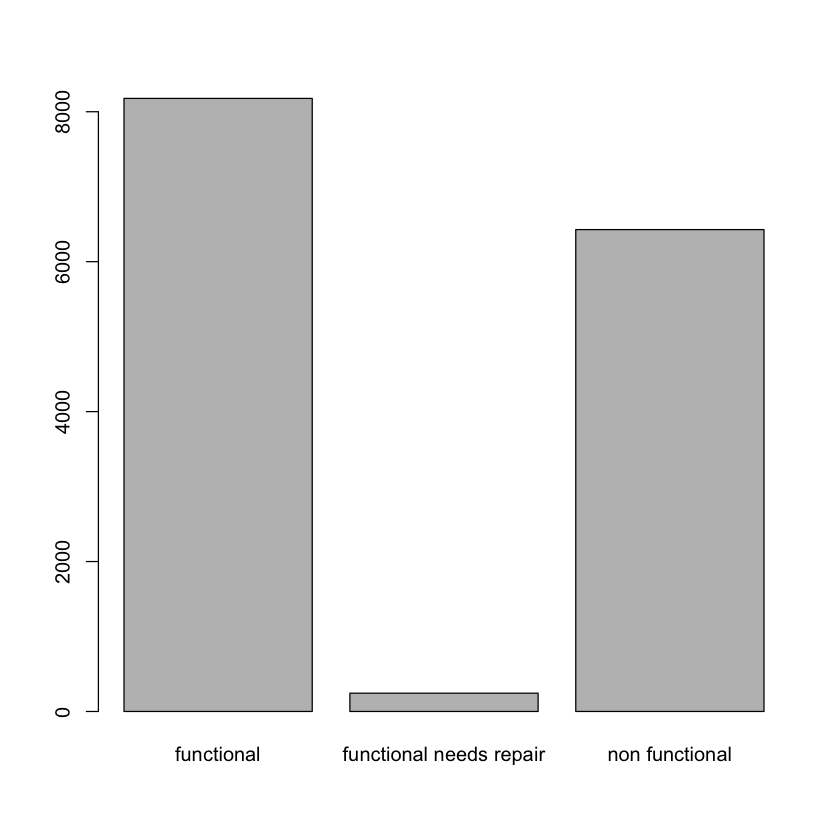

In [53]:
pred <- predict(md, as.matrix(test_preproc),reshape = T)
head(pred)
pred <- factor(max.col(pred),levels=1:3)
pred <- ifelse(pred == 1,"functional",ifelse(pred == 2, "functional needs repair", "non functional"))
barplot(table(pred))

In [54]:
res <- cbind("id"=eval_data$id,"status_group"=as.character(pred))
head(res)

id,status_group
50785,functional
51630,non functional
17168,functional
45559,non functional
49871,functional
52449,functional


In [55]:
write.csv(res,"submission.csv",row.names=FALSE)

# Conclusions